### About the Data Set
Healthy India, also known as the Pradhan Mantri Health Yojana (PMHY), is an upcoming nationwide scheme that aims to help economically vulnerable Indians who are in need of healthcare facilities. This yojana plans to provide financial protection to the families below poverty line by providing coverage for critical systems like Heart, Lung, Liver, Pancreas, etc. The government aims to make all the transactions cashless for covered procedures.
A BPL beneficiary can go to any hospital and come out without making any payment to the hospital for the procedures covered under the scheme.Prior to implementing this upcoming scheme effectively, Government of India (GoI) wanted to check the feasibility of the planned scheme by deriving insights using data gathered from similar existing schemes.
After some research, Aarogyasri Scheme was selected from a varied list of available schemes for the purpose of data gathering and analysis.
This scheme is a unique Community Health Insurance Scheme implemented in Andhra Pradesh in 2007 which provides financial protection to families living below poverty line up to Rs. 2 lakhs in a year for the treatment of serious ailments requiring hospitalization and surgery.

### AIM
* To predict the mortality of the patient based on the parameters given in the data
* This will help the government to know wether the insuarance is able to save the life of the patient.

In [246]:
# Reading the data

In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [248]:
# Reading the dataset
data = pd.read_csv(r"~\Downloads\Andhra_Health_Data.csv")

In [249]:
data.shape

(479688, 23)

In [250]:
new_df = data.sample( 200000,ignore_index=True)

In [251]:
new_df.columns

Index(['Sno', 'AGE', 'SEX', 'CASTE_NAME', 'CATEGORY_CODE', 'CATEGORY_NAME',
       'SURGERY_CODE', 'SURGERY', 'VILLAGE', 'MANDAL_NAME', 'DISTRICT_NAME',
       'PREAUTH_DATE', 'PREAUTH_AMT', 'CLAIM_DATE', 'CLAIM_AMOUNT',
       'HOSP_NAME', 'HOSP_TYPE', 'HOSP_DISTRICT', 'SURGERY_DATE',
       'DISCHARGE_DATE', 'Mortality Y / N', 'MORTALITY_DATE',
       'SRC_REGISTRATION'],
      dtype='object')

### Univariate Analysis

In [252]:
new_df.drop(columns=["Sno"],inplace=True,axis=1)

In [253]:
new_df.select_dtypes(include="object").columns

Index(['SEX', 'CASTE_NAME', 'CATEGORY_CODE', 'CATEGORY_NAME', 'SURGERY_CODE',
       'SURGERY', 'VILLAGE', 'MANDAL_NAME', 'DISTRICT_NAME', 'PREAUTH_DATE',
       'CLAIM_DATE', 'HOSP_NAME', 'HOSP_TYPE', 'HOSP_DISTRICT', 'SURGERY_DATE',
       'DISCHARGE_DATE', 'Mortality Y / N', 'MORTALITY_DATE',
       'SRC_REGISTRATION'],
      dtype='object')

In [254]:
cat_col = ['SEX', 'CASTE_NAME', 'CATEGORY_CODE', 'CATEGORY_NAME',
        'DISTRICT_NAME', 'HOSP_TYPE', 'HOSP_DISTRICT', 'Mortality Y / N',
       'SRC_REGISTRATION']

In [255]:
num_cols = ['AGE', 'PREAUTH_AMT', 'CLAIM_AMOUNT']

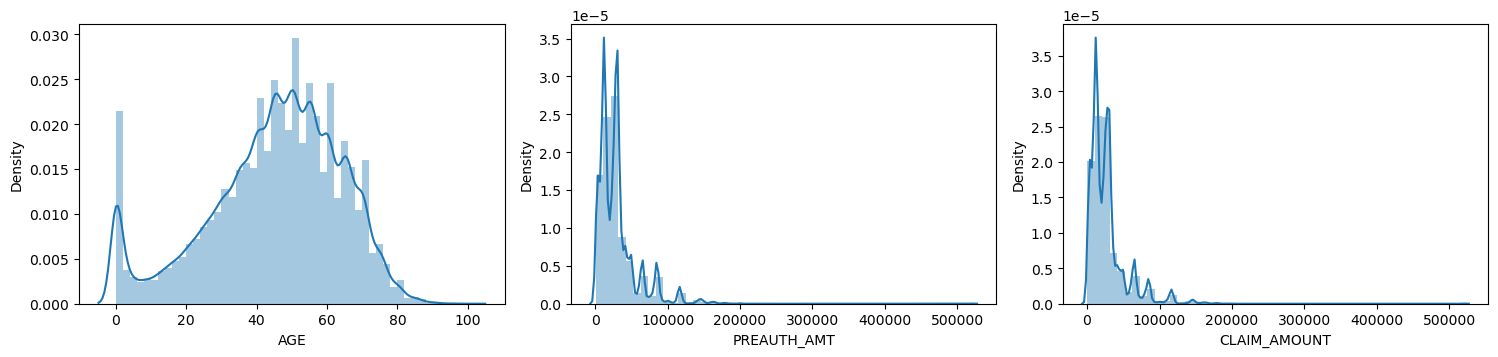

In [256]:
plt.figure(figsize=[20,10])
nrows=3
ncols=4
it=1
for i in num_cols:
    plt.subplot(nrows,ncols,it)
    sns.distplot(new_df.loc[:,i])
    it+=1
    
plt.tight_layout()
plt.show()

* We can see that some there are some patients with age 0, we can say that those are new born infants.
* Majority of the peoples age is between 40 and 60.
* Both Claim amount and Preith Amount is skewed.

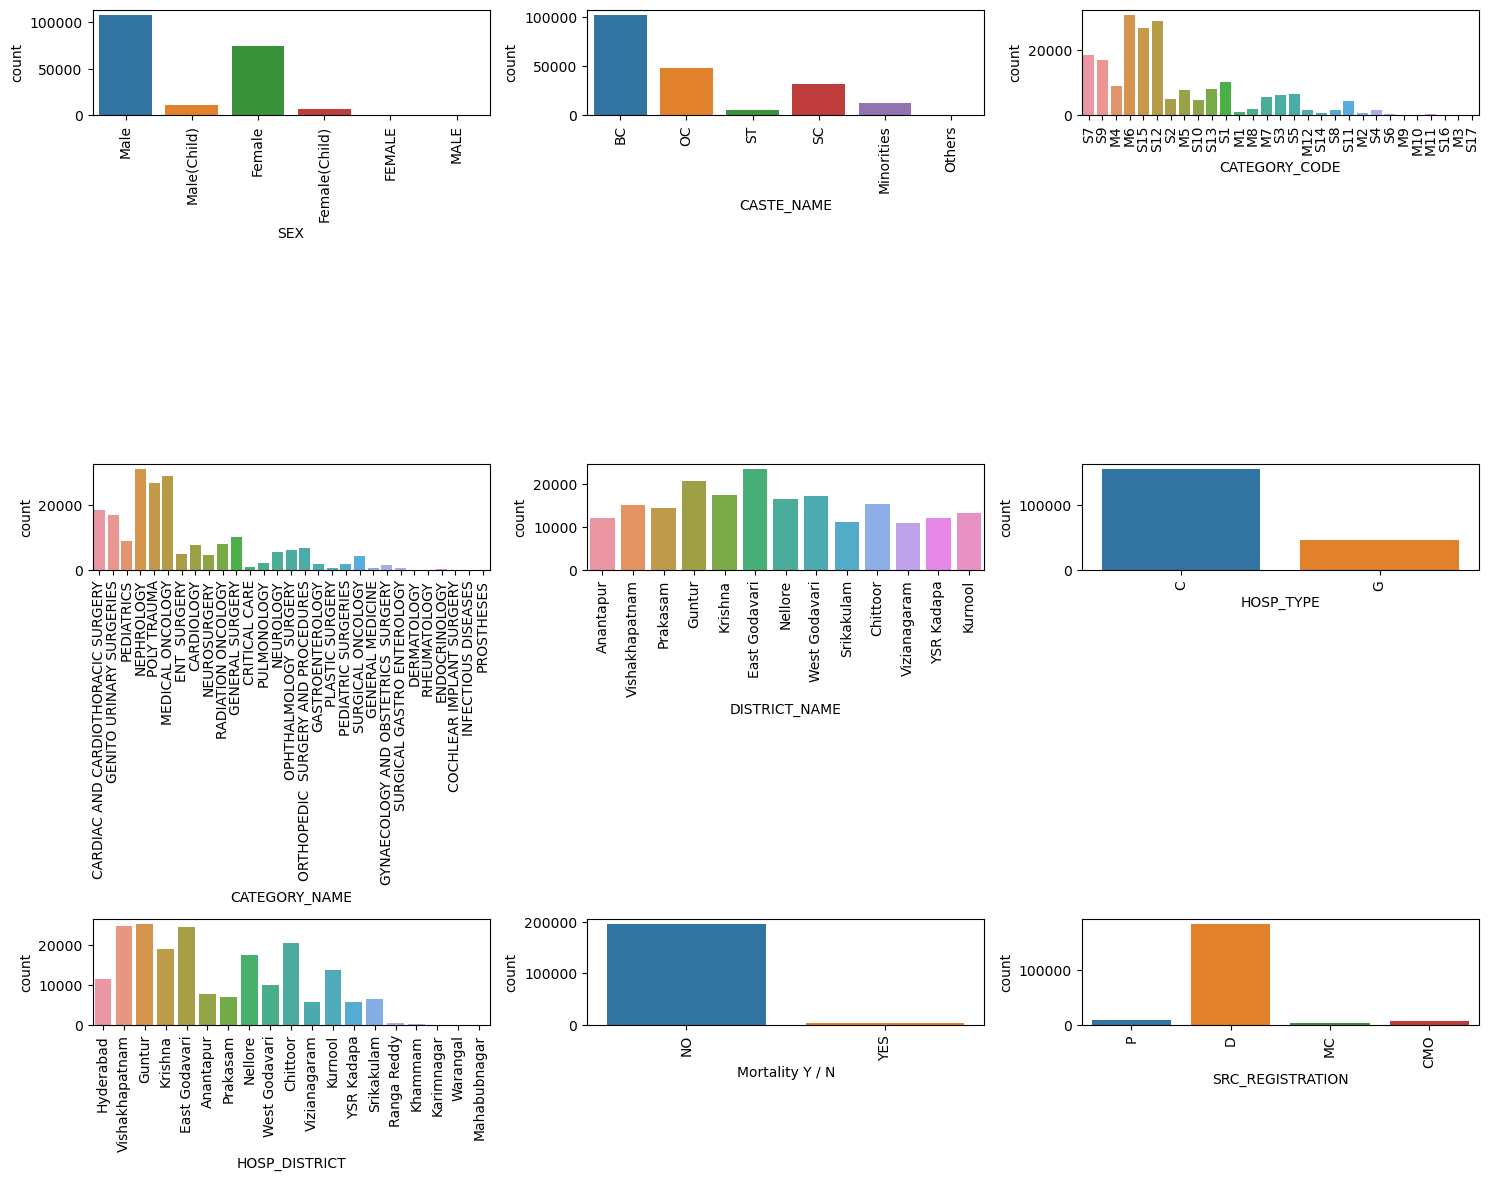

In [257]:
plt.figure(figsize=[15,15])
nrows=4
ncols=3
it=1
for i in cat_col:
    plt.subplot(nrows,ncols,it)
    sns.countplot(new_df.loc[:,i])
    plt.xticks(rotation=90)
    it+=1
    
plt.tight_layout()
plt.show()

* There are some dummy categerious in the category Sex like Male, MALE and Male(Child) etc. which we have to bin them together.
* Most peoples are coming from backward caste.
* Majority of people are going to Private Hospitals for treatment.
* In SRC_Registration D agency is registreing most of the hospitals.
* In Majority of the cases patient Survived.

## Bi -Variate Analysis

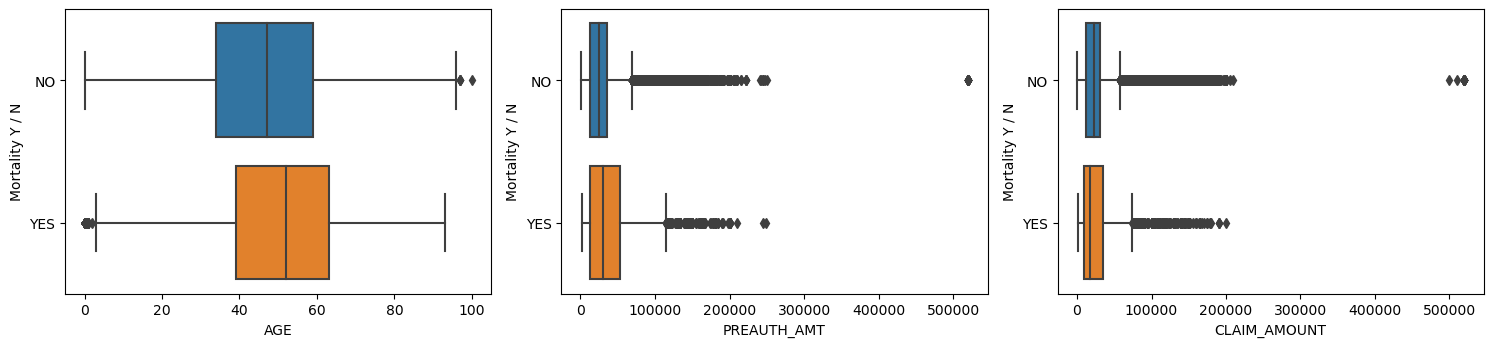

In [258]:
plt.figure(figsize=[20,10])
nrows=3
ncols=4
it=1
for i in num_cols:
    plt.subplot(nrows,ncols,it)
    sns.boxplot(x=new_df.loc[:,i],y=new_df['Mortality Y / N'])
    it+=1
    
plt.tight_layout()
plt.show()

* We conclude that the average age for people who are dying is 47 and who are not dying is 44.
* In both Preauth Amt and Claim AMT outliers are present

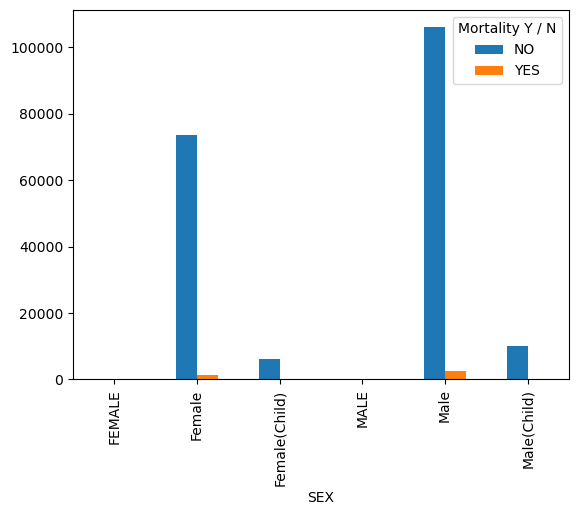

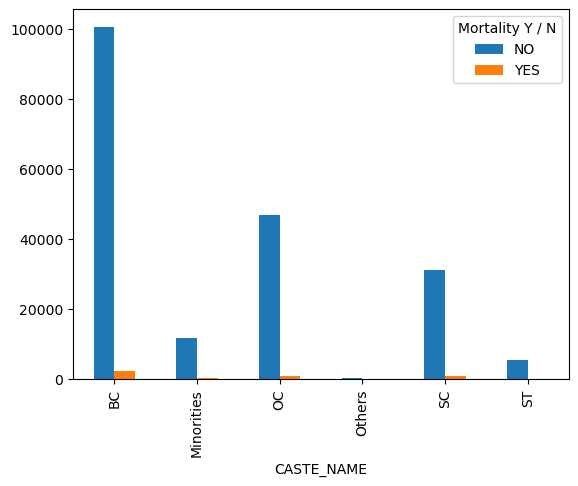

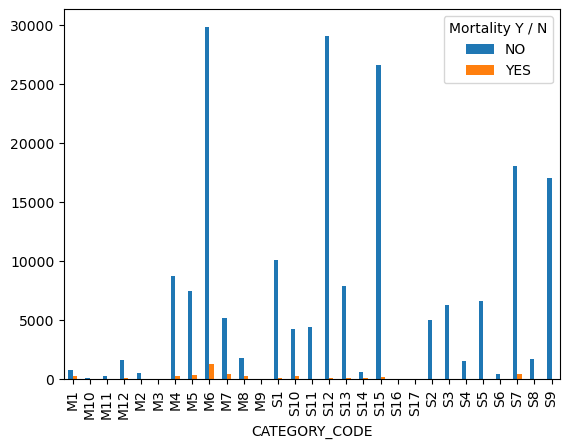

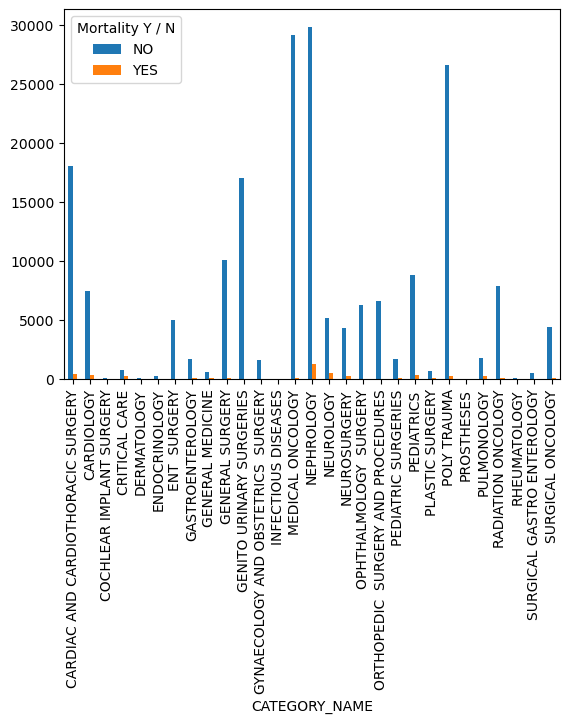

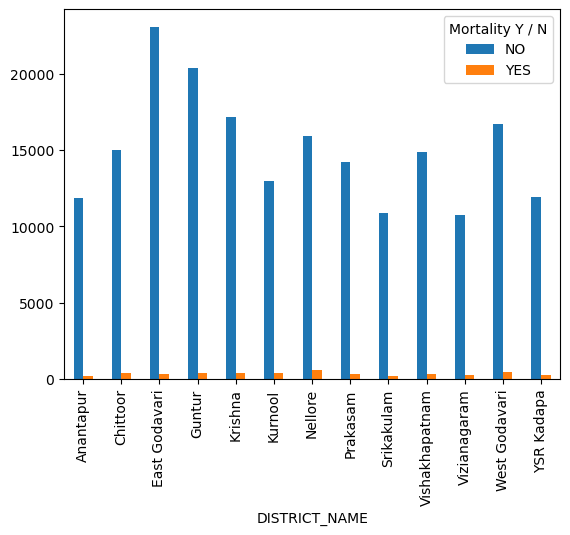

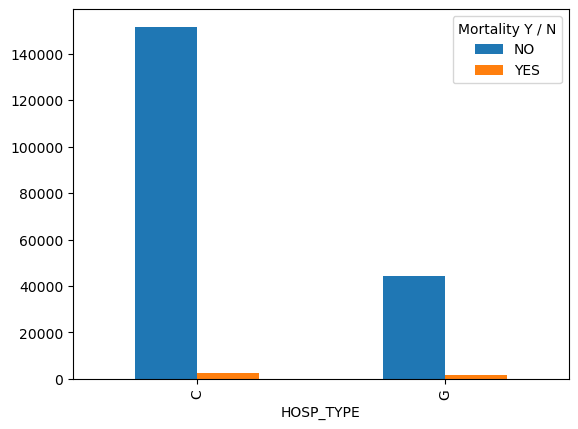

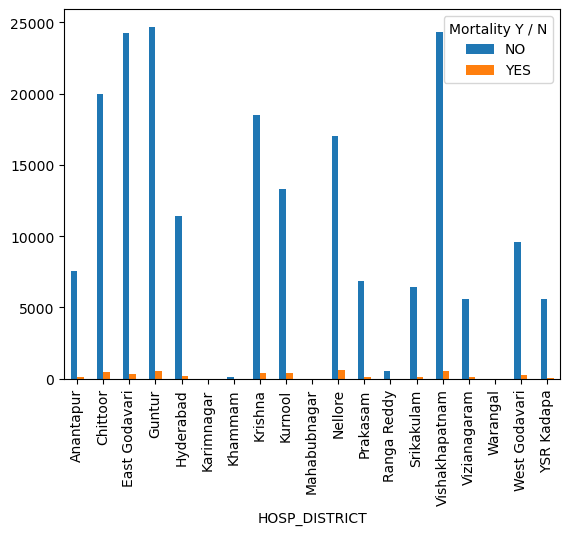

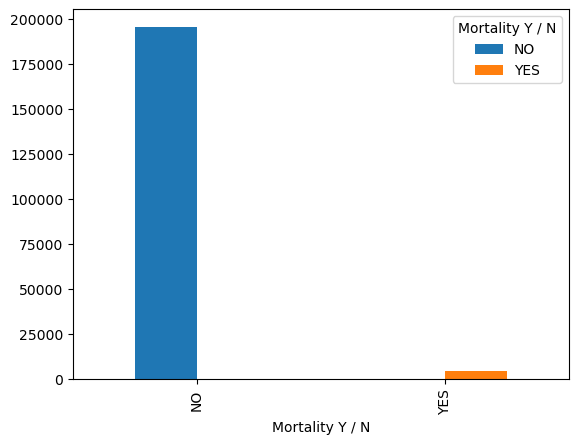

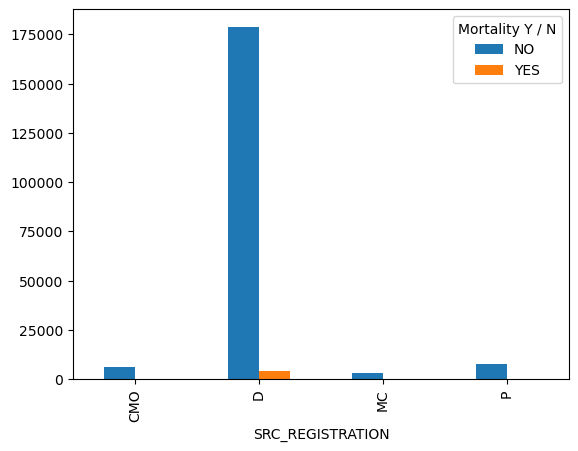

In [259]:
for i in cat_col:
    pd.crosstab(new_df[i],new_df["Mortality Y / N"]).plot(kind="bar")

## MISSING VALUES

In [260]:
#new_df.isnull().sum()

In [261]:
## lets deal with discharge date

In [262]:
new_df["CLAIM_DATE"] = new_df.CLAIM_DATE.str.split(" ",expand=True)[0]
new_df["PREAUTH_DATE"] = new_df.PREAUTH_DATE.str.split(" ",expand=True)[0]
new_df["DISCHARGE_DATE"] = new_df.DISCHARGE_DATE.str.split(" ",expand=True)[0]
new_df["SURGERY_DATE"] = new_df.SURGERY_DATE.str.split(" ",expand=True)[0]

In [263]:
new_df['CLAIM_DATE'] = pd.to_datetime(new_df['CLAIM_DATE'], format='%d-%m-%Y')
new_df['PREAUTH_DATE'] = pd.to_datetime(new_df['PREAUTH_DATE'], format='%d-%m-%Y')
new_df['SURGERY_DATE'] = pd.to_datetime(new_df['SURGERY_DATE'], format='%d-%m-%Y')

In [264]:
new_df.loc[new_df["DISCHARGE_DATE"]=="30/04/0116"]

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION


In [273]:
new_df['DISCHARGE_DATE'] = pd.to_datetime(new_df['DISCHARGE_DATE'], format='%d-%m-%Y')

In [274]:
new_df['Disch_after_surgery']=new_df['DISCHARGE_DATE']-new_df['SURGERY_DATE']

In [275]:
new_df['Disch_after_surgery']=new_df['Disch_after_surgery'].dt.days

In [276]:
new_df['Disch_after_surgery'].mean()

9.514610996112486

In [277]:
from datetime import datetime, timedelta

In [278]:
new_df.drop("MORTALITY_DATE",axis=1,inplace=True)

In [279]:
#.loc[new_df['DISCHARGE_DATE'].isnull(),['DISCHARGE_DATE']]=new_df['SURGERY_DATE'] + timedelta(days=9)

In [280]:
#new_df.loc[new_df['DISCHARGE_DATE'].isnull(),['DISCHARGE_DATE']]

In [281]:
new_df=new_df.loc[~(new_df['DISCHARGE_DATE'].isnull())]

In [282]:
new_df.isnull().sum()

AGE                    0
SEX                    0
CASTE_NAME             0
CATEGORY_CODE          0
CATEGORY_NAME          0
SURGERY_CODE           0
SURGERY                0
VILLAGE                0
MANDAL_NAME            0
DISTRICT_NAME          0
PREAUTH_DATE           0
PREAUTH_AMT            0
CLAIM_DATE             0
CLAIM_AMOUNT           0
HOSP_NAME              0
HOSP_TYPE              0
HOSP_DISTRICT          0
SURGERY_DATE           0
DISCHARGE_DATE         0
Mortality Y / N        0
SRC_REGISTRATION       0
Disch_after_surgery    0
dtype: int64

## OUTLIER TREATMENT

In [283]:
# as we are dealing with an insurance data , we will not deal with them

In [284]:
new_df['DISCHARGE_DATE']

0        2016-09-16
1        2017-04-20
2        2017-03-13
3        2016-12-19
4        2017-01-31
            ...    
199995   2017-06-13
199996   2016-12-23
199997   2017-01-07
199998   2016-11-22
199999   2017-03-11
Name: DISCHARGE_DATE, Length: 198070, dtype: datetime64[ns]

## FEATURE ENGINEERING

In [285]:
## let us look at the category codes

In [286]:
new_df.CATEGORY_CODE.value_counts(normalize=True)

M6     0.153900
S12    0.146993
S15    0.134740
S7     0.092356
S9     0.085848
S1     0.051149
M4     0.044964
S13    0.039961
M5     0.038436
S5     0.033428
S3     0.031443
M7     0.027707
S2     0.025153
S10    0.022376
S11    0.022366
M8     0.009431
S8     0.008542
M12    0.008482
S4     0.007896
M1     0.004418
S14    0.003398
M2     0.002792
S6     0.002307
M11    0.001126
M10    0.000429
S16    0.000177
M9     0.000167
S17    0.000010
M3     0.000005
Name: CATEGORY_CODE, dtype: float64

In [287]:
a= pd.DataFrame(pd.crosstab(new_df.CATEGORY_CODE,new_df["Mortality Y / N"]))

In [288]:
a["Ratio"] = a["YES"]/(a["YES"]+a["NO"])

In [289]:
a["Ratio"].describe()

count    29.000000
mean      0.020033
std       0.031410
min       0.000000
25%       0.000151
50%       0.004738
75%       0.023214
max       0.137143
Name: Ratio, dtype: float64

<AxesSubplot:xlabel='CATEGORY_CODE'>

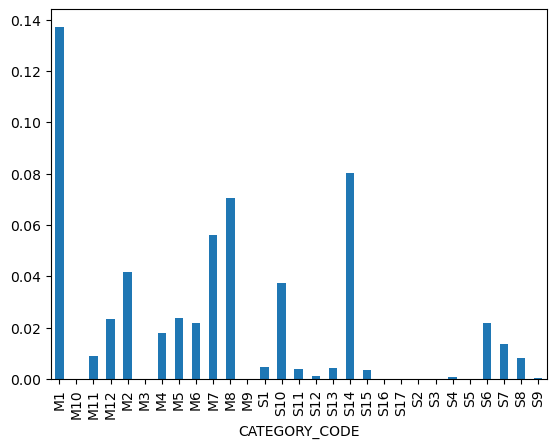

In [290]:
a["Ratio"].plot(kind="bar")

In [291]:
def sur_cat(x):
    if x in ['M1','M10','M12','M2','M4','M5','M6','M7','M8','S10','S14','S7','S8']:
        return("FATAL")
    else:
        return("NON_FATAL")

In [292]:
new_df["FAT/NON_FAT"] = new_df["CATEGORY_CODE"].apply(sur_cat)

<AxesSubplot:xlabel='FAT/NON_FAT'>

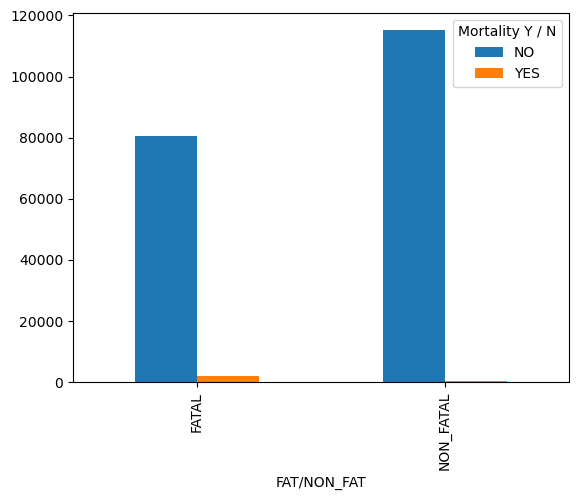

In [293]:
pd.crosstab(new_df["FAT/NON_FAT"],new_df["Mortality Y / N"]).plot(kind="bar")

In [294]:
## we can also look at which data is of surgery and which is of non surgery from category codes

In [295]:
def surgery(x):
    if x[0]=="S":
        return "Surgery"
    else:
        return "Not Surgery"

In [296]:
new_df["S/NS"] = new_df["CATEGORY_CODE"].apply(surgery)

<AxesSubplot:xlabel='S/NS'>

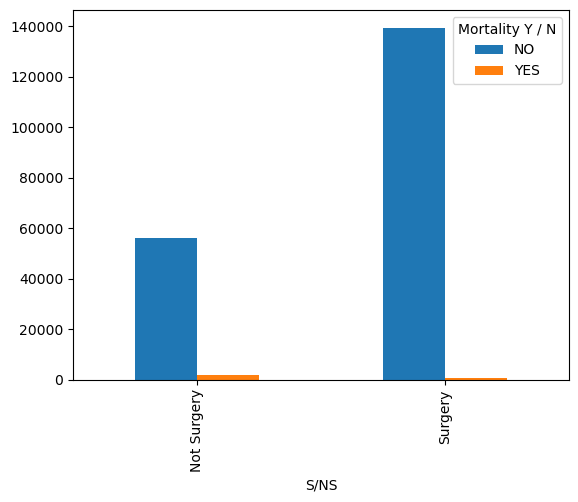

In [297]:
pd.crosstab(new_df["S/NS"],new_df["Mortality Y / N"]).plot(kind="bar")

In [298]:
# Clearly it is visible that people not undergoing Surgery are more prone to diseases.

In [299]:
b = pd.DataFrame(pd.crosstab(new_df["S/NS"],new_df["Mortality Y / N"]))

In [300]:
b["ratio"] = b["YES"]/(b["YES"]+b["NO"])

In [301]:
b

Mortality Y / N,NO,YES,ratio
S/NS,,,
Not Surgery,56181,1627,0.028145
Surgery,139534,728,0.005190


#### Inference
* We can see that if a person undergoes surgery his chances of Survival Increases by 5 times.

In [302]:
## lets look at category namess
new_df["CATEGORY_NAME"].value_counts(normalize = True)

NEPHROLOGY                             0.153900
MEDICAL ONCOLOGY                       0.146993
POLY TRAUMA                            0.134740
CARDIAC AND CARDIOTHORACIC SURGERY     0.092356
GENITO URINARY SURGERIES               0.085848
GENERAL SURGERY                        0.051149
PEDIATRICS                             0.044964
RADIATION ONCOLOGY                     0.039961
CARDIOLOGY                             0.038436
ORTHOPEDIC  SURGERY AND PROCEDURES     0.033428
OPHTHALMOLOGY  SURGERY                 0.031443
NEUROLOGY                              0.027707
ENT  SURGERY                           0.025153
NEUROSURGERY                           0.022376
SURGICAL ONCOLOGY                      0.022366
PULMONOLOGY                            0.009431
PEDIATRIC SURGERIES                    0.008542
GASTROENTEROLOGY                       0.008482
GYNAECOLOGY AND OBSTETRICS  SURGERY    0.007896
CRITICAL CARE                          0.004418
PLASTIC SURGERY                        0

In [303]:
def bodypart(x):
    if x in ['CARDIAC AND CARDIOTHORACIC SURGERY','CARDIOLOGY']:
        return("Heart")
    
    elif x in ['GASTROENTEROLOGY','SURGICAL GASTRO ENTEROLOGY']:
        return("Stomach")
    
    elif x in ['NEUROLOGY','NEUROSURGERY']:
        return("Brain")
    
    elif x in ["OPHTHALMOLOGY  SURGERY ","ENT  SURGERY","PLASTIC SURGERY","DERMATOLOGY","COCHLEAR IMPLANT SURGERY"]:
        return("Eye/ear/skin/nose")
    
    elif x in ["NEPHROLOGY","GYNAECOLOGY AND OBSTETRICS  SURGER"]:
        return("urinary sysytem")
    
    elif x in ["MEDICAL ONCOLOGY","RADIATION ONCOLOGY","GENITO URINARY SURGERIES","SURGICAL ONCOLOGY"]:
        return("cancer")
    
    elif x in ["POLY TRAUMA","ORTHOPEDIC  SURGERY AND PROCEDURES"]:
        return("Organ/Bones")
    
    elif x in ["PULMONOLOGY"]:
        return("lungs")
    
    else:
        return("Other")

In [304]:
new_df["Body_parts"] = new_df["CATEGORY_NAME"].apply(bodypart)

<AxesSubplot:xlabel='Body_parts'>

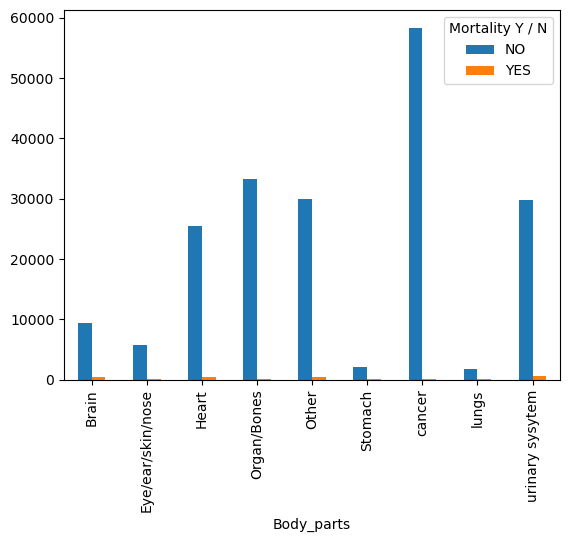

In [305]:
pd.crosstab(new_df["Body_parts"],new_df["Mortality Y / N"]).plot(kind='bar')

In [306]:
c = pd.DataFrame(pd.crosstab(new_df["Body_parts"],new_df["Mortality Y / N"]))
c["ratio"] = c["YES"]/(c["YES"]+c["NO"])

In [307]:
c

Mortality Y / N,NO,YES,ratio
Body_parts,,,
Brain,9448,472,0.047581
Eye/ear/skin/nose,5669,54,0.009436
Heart,25477,429,0.016560
Organ/Bones,33210,99,0.002972
Other,29893,367,0.012128
Stomach,2088,49,0.022929
cancer,58376,88,0.001505
lungs,1736,132,0.070664
urinary sysytem,29818,665,0.021815


INFERENCE
* Most of the people are suffering from cancer.
* If a person is suffering from lung disease there is 7 percent chance that person will die.
* If a person is suffering from Brain disease there is 4 percent chance that person will die.


In [308]:
new_df["DISTRICT_NAME"].value_counts()

East Godavari     23274
Guntur            20645
Krishna           17353
West Godavari     16916
Nellore           16200
Chittoor          15224
Vishakhapatnam    15094
Prakasam          14362
Kurnool           13181
YSR Kadapa        12051
Anantapur         11928
Srikakulam        10978
Vizianagaram      10864
Name: DISTRICT_NAME, dtype: int64

In [309]:
## we should now use the area data
def pronearea(x):
    if x in ["East Godavari","Guntur","Krishna"]:
        return("Disease_Prone_Area")
    elif x in ["West Godavari","Nellore","Chittoor","Vishakhapatnam"]:
        return("Mid_prone_area")
    else:
        return("Disease_Non_prone_area")
        

In [310]:
new_df["Area_prone"] = new_df["DISTRICT_NAME"].map(pronearea)

<AxesSubplot:xlabel='Area_prone'>

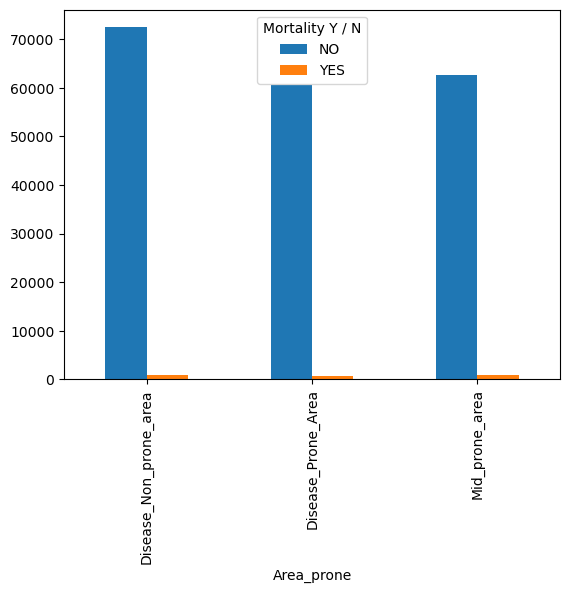

In [311]:
pd.crosstab(new_df["Area_prone"],new_df["Mortality Y / N"]).plot(kind='bar')

#### Making new features based on dates 
* How much time it take for claim settlement.
* After how many days of applying the person get claim
* How many days it took for the surgery.
* How many days the person is admitted in the hospital

In [312]:
new_df['Claim_after_surgery']=new_df['CLAIM_DATE']-new_df['SURGERY_DATE']

In [313]:
new_df['Claim_after_PreAuth']=new_df['CLAIM_DATE']-new_df['PREAUTH_DATE']

In [314]:
new_df['Surgery_time']=new_df['SURGERY_DATE']-new_df['PREAUTH_DATE']

In [315]:
new_df['DISCHARGE_DATE']=new_df['DISCHARGE_DATE'].astype('str')

In [316]:
new_df["DISCHARGE_DATE"] = new_df.DISCHARGE_DATE.str.split(" ",expand=True)[0]

In [317]:
new_df['DISCHARGE_DATE'] = pd.to_datetime(new_df['DISCHARGE_DATE'], format='%Y-%m-%d')

In [318]:
new_df.loc[new_df['DISCHARGE_DATE']=='1500940800000000000',"DISCHARGE_DATE"]=2017-1-1

In [319]:
new_df.head()

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,SRC_REGISTRATION,Disch_after_surgery,FAT/NON_FAT,S/NS,Body_parts,Area_prone,Claim_after_surgery,Claim_after_PreAuth,Surgery_time
0,54,Male,BC,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.1.1.4,PTCA 1 Additional Drug eluting Stent (00.46),Singanamala,Singanamala,Anantapur,2016-09-14,85010,2017-01-11,85010,Yashoda Hospitals - Somajiguda,C,Hyderabad,2016-09-15,2016-09-16 00:00:00,NO,P,1.0,FATAL,Surgery,Heart,Disease_Non_prone_area,118 days,119 days,1 days
1,61,Male,OC,S9,GENITO URINARY SURGERIES,S9.9.1,Transurethral Resection of Prostate (TURP),Ward-23,Visakhapatnam,Vishakhapatnam,2017-04-11,30000,2017-05-16,30000,ADITYA MULTI CARE HOSPITAL,C,Vishakhapatnam,2017-04-15,2017-04-20 00:00:00,NO,D,5.0,NON_FATAL,Surgery,cancer,Mid_prone_area,31 days,35 days,4 days
2,0,Male(Child),ST,M4,PEDIATRICS,M4.1.5,Medicalmanagement of Preterm baby of 33 To 34 ...,Racha Konda,Pullalacheruvu,Prakasam,2017-03-11,35000,2017-07-07,30000,"Government General Hospital, Guntur",G,Guntur,2017-03-06,2017-03-13 00:00:00,NO,D,7.0,FATAL,Not Surgery,Other,Disease_Non_prone_area,123 days,118 days,-5 days
3,50,Male,OC,M6,NEPHROLOGY,M6.4,Medical Management of Chronic Renal Failure 1 ...,Akurajupalli,Machavaram,Guntur,2016-12-16,30870,2017-07-31,29070,"Government General Hospital, Guntur",G,Guntur,2016-12-15,2016-12-19 00:00:00,NO,D,4.0,FATAL,Not Surgery,urinary sysytem,Disease_Prone_Area,228 days,227 days,-1 days
4,75,Female,SC,S15,POLY TRAUMA,S15.1.1,Surgical Correction Of Longbone Fracture,Ghantasala,Ghantasala,Krishna,2017-01-20,41500,2017-06-06,28300,District Hospital - Machilipatnam,G,Krishna,2017-01-23,2017-01-31 00:00:00,NO,D,8.0,NON_FATAL,Surgery,Organ/Bones,Disease_Prone_Area,134 days,137 days,3 days


In [323]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198070 entries, 0 to 199999
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype          
---  ------               --------------   -----          
 0   AGE                  198070 non-null  int64          
 1   SEX                  198070 non-null  object         
 2   CASTE_NAME           198070 non-null  object         
 3   CATEGORY_CODE        198070 non-null  object         
 4   CATEGORY_NAME        198070 non-null  object         
 5   SURGERY_CODE         198070 non-null  object         
 6   SURGERY              198070 non-null  object         
 7   VILLAGE              198070 non-null  object         
 8   MANDAL_NAME          198070 non-null  object         
 9   DISTRICT_NAME        198070 non-null  object         
 10  PREAUTH_DATE         198070 non-null  datetime64[ns] 
 11  PREAUTH_AMT          198070 non-null  int64          
 12  CLAIM_DATE           198070 non-null  datetime64[ns] 
 13 

In [324]:
new_df['DISCHARGE_DATE'] = pd.to_datetime(new_df['DISCHARGE_DATE'], format='%Y-%m-%d')

In [325]:
new_df['Admit_time']=new_df['DISCHARGE_DATE']-new_df['PREAUTH_DATE']

In [326]:
new_df['Admit_time']=new_df['Admit_time'].dt.days

In [327]:
new_df

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,SRC_REGISTRATION,Disch_after_surgery,FAT/NON_FAT,S/NS,Body_parts,Area_prone,Claim_after_surgery,Claim_after_PreAuth,Surgery_time,Admit_time
0,54,Male,BC,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.1.1.4,PTCA 1 Additional Drug eluting Stent (00.46),Singanamala,Singanamala,Anantapur,2016-09-14,85010,2017-01-11,85010,Yashoda Hospitals - Somajiguda,C,Hyderabad,2016-09-15,2016-09-16,NO,P,1.0,FATAL,Surgery,Heart,Disease_Non_prone_area,118 days,119 days,1 days,2
1,61,Male,OC,S9,GENITO URINARY SURGERIES,S9.9.1,Transurethral Resection of Prostate (TURP),Ward-23,Visakhapatnam,Vishakhapatnam,2017-04-11,30000,2017-05-16,30000,ADITYA MULTI CARE HOSPITAL,C,Vishakhapatnam,2017-04-15,2017-04-20,NO,D,5.0,NON_FATAL,Surgery,cancer,Mid_prone_area,31 days,35 days,4 days,9
2,0,Male(Child),ST,M4,PEDIATRICS,M4.1.5,Medicalmanagement of Preterm baby of 33 To 34 ...,Racha Konda,Pullalacheruvu,Prakasam,2017-03-11,35000,2017-07-07,30000,"Government General Hospital, Guntur",G,Guntur,2017-03-06,2017-03-13,NO,D,7.0,FATAL,Not Surgery,Other,Disease_Non_prone_area,123 days,118 days,-5 days,2
3,50,Male,OC,M6,NEPHROLOGY,M6.4,Medical Management of Chronic Renal Failure 1 ...,Akurajupalli,Machavaram,Guntur,2016-12-16,30870,2017-07-31,29070,"Government General Hospital, Guntur",G,Guntur,2016-12-15,2016-12-19,NO,D,4.0,FATAL,Not Surgery,urinary sysytem,Disease_Prone_Area,228 days,227 days,-1 days,3
4,75,Female,SC,S15,POLY TRAUMA,S15.1.1,Surgical Correction Of Longbone Fracture,Ghantasala,Ghantasala,Krishna,2017-01-20,41500,2017-06-06,28300,District Hospital - Machilipatnam,G,Krishna,2017-01-23,2017-01-31,NO,D,8.0,NON_FATAL,Surgery,Organ/Bones,Disease_Prone_Area,134 days,137 days,3 days,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,69,Male,OC,S15,POLY TRAUMA,S15.3.1.2,Intesive care management for Chest injuries in...,Anikala Palli,Chadrasekarapuram,Prakasam,2017-06-10,35000,2017-08-09,20000,Narayana Medical College Hospital,C,Nellore,2017-06-08,2017-06-13,NO,D,5.0,NON_FATAL,Surgery,Organ/Bones,Disease_Non_prone_area,62 days,60 days,-2 days,3
199996,34,Female,BC,S10,NEUROSURGERY,S10.1.7,Excision of Basal Brain tumour,Chadrasekarapuram,Chadrasekarapuram,Prakasam,2016-12-18,70000,2017-05-16,70000,SIMHAPURI HOSPITALS,C,Nellore,2016-12-20,2016-12-23,NO,D,3.0,FATAL,Surgery,Brain,Disease_Non_prone_area,147 days,149 days,2 days,5
199997,52,Male,SC,S10,NEUROSURGERY,S10.5.4,"Spinal Fixation Rods And Plates, Artificial Discs",Banaganapalle,Banaganapalle,Kurnool,2016-12-23,85000,2017-05-22,50000,Govt General Hospital Kurnool,G,Kurnool,2016-12-27,2017-01-07,NO,D,11.0,FATAL,Surgery,Brain,Disease_Non_prone_area,146 days,150 days,4 days,15
199998,50,Female,BC,S15,POLY TRAUMA,S15.1.1,Surgical Correction Of Longbone Fracture,Bayyavaram,Kasimkota,Vishakhapatnam,2016-11-16,30000,2017-02-03,30000,USHA PRIME MULTI SPECIALITY HOSPITAL A DIVISIO...,C,Vishakhapatnam,2016-11-17,2016-11-22,NO,D,5.0,NON_FATAL,Surgery,Organ/Bones,Mid_prone_area,78 days,79 days,1 days,6


<AxesSubplot:xlabel='Mortality Y / N', ylabel='Admit_time'>

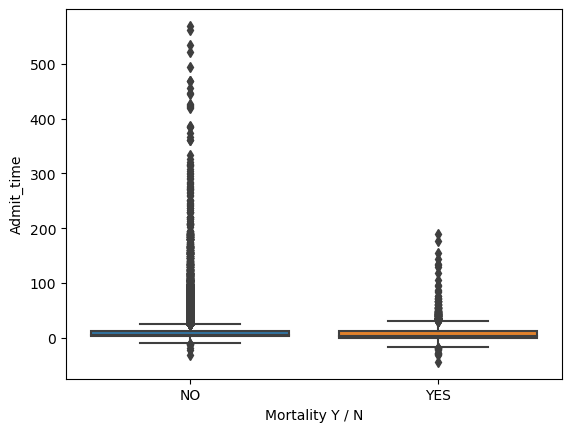

In [328]:
sns.boxplot(new_df['Mortality Y / N'],new_df['Admit_time'])

In [329]:
new_df.head()

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,SRC_REGISTRATION,Disch_after_surgery,FAT/NON_FAT,S/NS,Body_parts,Area_prone,Claim_after_surgery,Claim_after_PreAuth,Surgery_time,Admit_time
0,54,Male,BC,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.1.1.4,PTCA 1 Additional Drug eluting Stent (00.46),Singanamala,Singanamala,Anantapur,2016-09-14,85010,2017-01-11,85010,Yashoda Hospitals - Somajiguda,C,Hyderabad,2016-09-15,2016-09-16,NO,P,1.0,FATAL,Surgery,Heart,Disease_Non_prone_area,118 days,119 days,1 days,2
1,61,Male,OC,S9,GENITO URINARY SURGERIES,S9.9.1,Transurethral Resection of Prostate (TURP),Ward-23,Visakhapatnam,Vishakhapatnam,2017-04-11,30000,2017-05-16,30000,ADITYA MULTI CARE HOSPITAL,C,Vishakhapatnam,2017-04-15,2017-04-20,NO,D,5.0,NON_FATAL,Surgery,cancer,Mid_prone_area,31 days,35 days,4 days,9
2,0,Male(Child),ST,M4,PEDIATRICS,M4.1.5,Medicalmanagement of Preterm baby of 33 To 34 ...,Racha Konda,Pullalacheruvu,Prakasam,2017-03-11,35000,2017-07-07,30000,"Government General Hospital, Guntur",G,Guntur,2017-03-06,2017-03-13,NO,D,7.0,FATAL,Not Surgery,Other,Disease_Non_prone_area,123 days,118 days,-5 days,2
3,50,Male,OC,M6,NEPHROLOGY,M6.4,Medical Management of Chronic Renal Failure 1 ...,Akurajupalli,Machavaram,Guntur,2016-12-16,30870,2017-07-31,29070,"Government General Hospital, Guntur",G,Guntur,2016-12-15,2016-12-19,NO,D,4.0,FATAL,Not Surgery,urinary sysytem,Disease_Prone_Area,228 days,227 days,-1 days,3
4,75,Female,SC,S15,POLY TRAUMA,S15.1.1,Surgical Correction Of Longbone Fracture,Ghantasala,Ghantasala,Krishna,2017-01-20,41500,2017-06-06,28300,District Hospital - Machilipatnam,G,Krishna,2017-01-23,2017-01-31,NO,D,8.0,NON_FATAL,Surgery,Organ/Bones,Disease_Prone_Area,134 days,137 days,3 days,11


In [330]:
lis = ['Claim_after_surgery','Claim_after_PreAuth','Claim_after_PreAuth']

In [331]:
new_df["Claim_after_surgery"]=new_df["Claim_after_surgery"].astype("string")

In [332]:
new_df["Claim_after_surgery"] = new_df.Claim_after_surgery.str.split(" ",expand=True)[0]

In [333]:
new_df["Claim_after_PreAuth"]=new_df["Claim_after_PreAuth"].astype("string")
new_df["Claim_after_PreAuth"] = new_df.Claim_after_PreAuth.str.split(" ",expand=True)[0]

new_df["Surgery_time"]=new_df["Surgery_time"].astype("string")
new_df["Surgery_time"] = new_df.Surgery_time.str.split(" ",expand=True)[0]

In [334]:
new_df.head()

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,SRC_REGISTRATION,Disch_after_surgery,FAT/NON_FAT,S/NS,Body_parts,Area_prone,Claim_after_surgery,Claim_after_PreAuth,Surgery_time,Admit_time
0,54,Male,BC,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.1.1.4,PTCA 1 Additional Drug eluting Stent (00.46),Singanamala,Singanamala,Anantapur,2016-09-14,85010,2017-01-11,85010,Yashoda Hospitals - Somajiguda,C,Hyderabad,2016-09-15,2016-09-16,NO,P,1.0,FATAL,Surgery,Heart,Disease_Non_prone_area,118,119,1,2
1,61,Male,OC,S9,GENITO URINARY SURGERIES,S9.9.1,Transurethral Resection of Prostate (TURP),Ward-23,Visakhapatnam,Vishakhapatnam,2017-04-11,30000,2017-05-16,30000,ADITYA MULTI CARE HOSPITAL,C,Vishakhapatnam,2017-04-15,2017-04-20,NO,D,5.0,NON_FATAL,Surgery,cancer,Mid_prone_area,31,35,4,9
2,0,Male(Child),ST,M4,PEDIATRICS,M4.1.5,Medicalmanagement of Preterm baby of 33 To 34 ...,Racha Konda,Pullalacheruvu,Prakasam,2017-03-11,35000,2017-07-07,30000,"Government General Hospital, Guntur",G,Guntur,2017-03-06,2017-03-13,NO,D,7.0,FATAL,Not Surgery,Other,Disease_Non_prone_area,123,118,-5,2
3,50,Male,OC,M6,NEPHROLOGY,M6.4,Medical Management of Chronic Renal Failure 1 ...,Akurajupalli,Machavaram,Guntur,2016-12-16,30870,2017-07-31,29070,"Government General Hospital, Guntur",G,Guntur,2016-12-15,2016-12-19,NO,D,4.0,FATAL,Not Surgery,urinary sysytem,Disease_Prone_Area,228,227,-1,3
4,75,Female,SC,S15,POLY TRAUMA,S15.1.1,Surgical Correction Of Longbone Fracture,Ghantasala,Ghantasala,Krishna,2017-01-20,41500,2017-06-06,28300,District Hospital - Machilipatnam,G,Krishna,2017-01-23,2017-01-31,NO,D,8.0,NON_FATAL,Surgery,Organ/Bones,Disease_Prone_Area,134,137,3,11


In [335]:
#sns.boxplot(new_df["Mortality Y / N"],new_df["Claim_after_surgery"])

In [336]:
dic = new_df.HOSP_NAME.value_counts().to_dict()

In [337]:
new_df["Frequency_of_visit"]=new_df.HOSP_NAME.map(dic)

In [338]:
def merafunction(x):
    if 3500<x<6800:
        return("Most Highly Visited")
    elif 1500<x<3500:
        return("Highly Visited")
    elif 500<x<1500:
        return("Moderately Visited")
    else:
        return("Least Visited")

In [339]:
new_df["Type_as_visit"] = new_df["Frequency_of_visit"].apply(merafunction)

In [340]:
new_df.drop(columns= "Frequency_of_visit",axis=1,inplace=True)

<AxesSubplot:xlabel='Type_as_visit'>

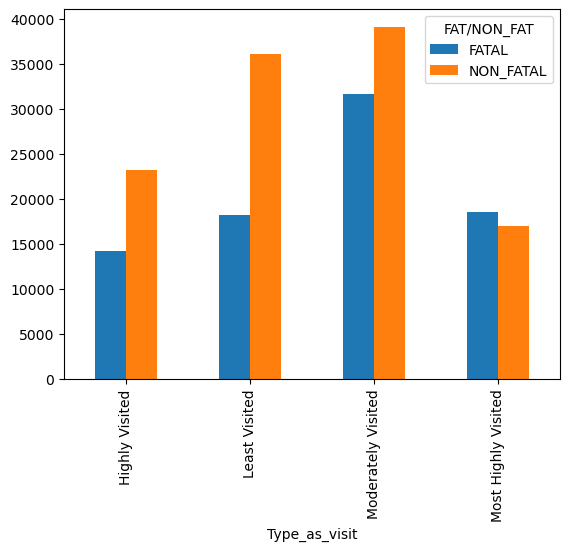

In [341]:
pd.crosstab(new_df["Type_as_visit"],new_df["FAT/NON_FAT"]).plot(kind='bar')

#### Making another new feature of change of District
* This generally happens when the person is having a fatal disease changes his district, goes to a bigger district for treatment.

In [342]:
new_df["Change_of_district"]=np.where((new_df["DISTRICT_NAME"]==new_df["HOSP_DISTRICT"])&(new_df["FAT/NON_FAT"]=="FATAL"),0,1)

<AxesSubplot:xlabel='Change_of_district'>

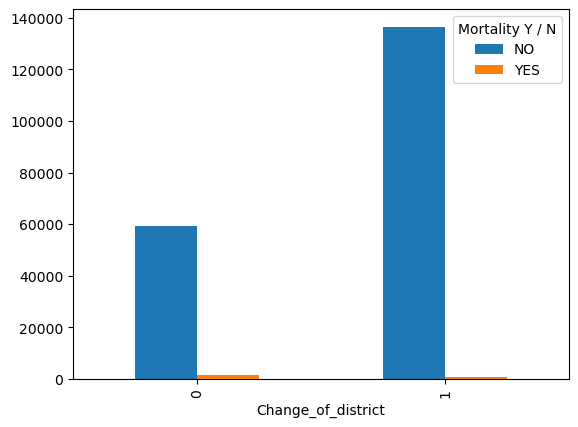

In [343]:
pd.crosstab(new_df["Change_of_district"],new_df["Mortality Y / N"]).plot(kind='bar')

In [344]:
d = pd.DataFrame(pd.crosstab(new_df["Change_of_district"],new_df["Mortality Y / N"]))
d["ratio"] = d["YES"]/(d["YES"]+d["NO"])


In [345]:
d

Mortality Y / N,NO,YES,ratio
Change_of_district,,,
0,59121,1538,0.025355
1,136594,817,0.005946


#### We see that if a person changes district for treatment of fatal disease the chances of his survival increased 4 times

In [346]:
### Dealing with Dummy values in the column Sex

In [347]:
new_df.loc[new_df["SEX"]=="FEMALE","SEX"] = "Female"
new_df.loc[new_df["SEX"]=="MALE","SEX"] = "Male"
new_df.loc[(new_df["SEX"]=="Male(Child)"),"SEX"] = "Male"
new_df.loc[(new_df["SEX"]=="Female(Child)"),"SEX"] = "Female"


<AxesSubplot:xlabel='SEX', ylabel='count'>

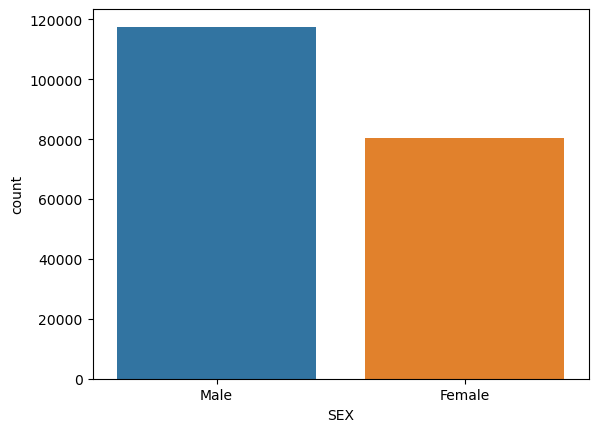

In [348]:
sns.countplot(new_df.SEX)

In [349]:
new_df.loc[(new_df["CASTE_NAME"]=="Others"),"CASTE_NAME"] = "Minorities"
new_df.loc[(new_df["CASTE_NAME"]=="SC")|(new_df["CASTE_NAME"]=="ST"),"CASTE_NAME"] = "SC/ST"

<AxesSubplot:xlabel='CASTE_NAME', ylabel='count'>

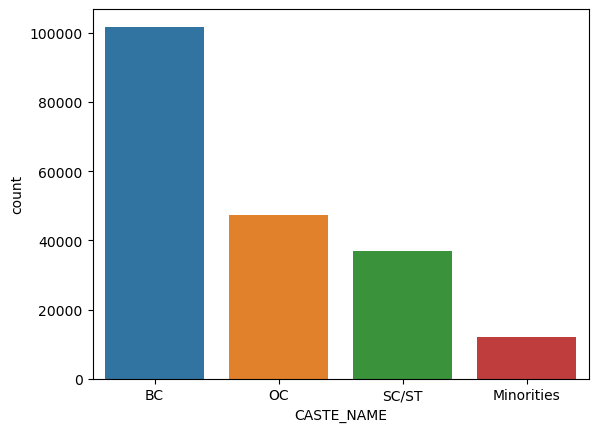

In [350]:
sns.countplot(new_df.CASTE_NAME)

In [351]:
new_df.head()

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,SRC_REGISTRATION,Disch_after_surgery,FAT/NON_FAT,S/NS,Body_parts,Area_prone,Claim_after_surgery,Claim_after_PreAuth,Surgery_time,Admit_time,Type_as_visit,Change_of_district
0,54,Male,BC,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.1.1.4,PTCA 1 Additional Drug eluting Stent (00.46),Singanamala,Singanamala,Anantapur,2016-09-14,85010,2017-01-11,85010,Yashoda Hospitals - Somajiguda,C,Hyderabad,2016-09-15,2016-09-16,NO,P,1.0,FATAL,Surgery,Heart,Disease_Non_prone_area,118,119,1,2,Least Visited,1
1,61,Male,OC,S9,GENITO URINARY SURGERIES,S9.9.1,Transurethral Resection of Prostate (TURP),Ward-23,Visakhapatnam,Vishakhapatnam,2017-04-11,30000,2017-05-16,30000,ADITYA MULTI CARE HOSPITAL,C,Vishakhapatnam,2017-04-15,2017-04-20,NO,D,5.0,NON_FATAL,Surgery,cancer,Mid_prone_area,31,35,4,9,Least Visited,1
2,0,Male,SC/ST,M4,PEDIATRICS,M4.1.5,Medicalmanagement of Preterm baby of 33 To 34 ...,Racha Konda,Pullalacheruvu,Prakasam,2017-03-11,35000,2017-07-07,30000,"Government General Hospital, Guntur",G,Guntur,2017-03-06,2017-03-13,NO,D,7.0,FATAL,Not Surgery,Other,Disease_Non_prone_area,123,118,-5,2,Most Highly Visited,1
3,50,Male,OC,M6,NEPHROLOGY,M6.4,Medical Management of Chronic Renal Failure 1 ...,Akurajupalli,Machavaram,Guntur,2016-12-16,30870,2017-07-31,29070,"Government General Hospital, Guntur",G,Guntur,2016-12-15,2016-12-19,NO,D,4.0,FATAL,Not Surgery,urinary sysytem,Disease_Prone_Area,228,227,-1,3,Most Highly Visited,0
4,75,Female,SC/ST,S15,POLY TRAUMA,S15.1.1,Surgical Correction Of Longbone Fracture,Ghantasala,Ghantasala,Krishna,2017-01-20,41500,2017-06-06,28300,District Hospital - Machilipatnam,G,Krishna,2017-01-23,2017-01-31,NO,D,8.0,NON_FATAL,Surgery,Organ/Bones,Disease_Prone_Area,134,137,3,11,Least Visited,1


In [352]:
new_df.shape

(198070, 32)

In [353]:
new_df.corr()

,AGE,PREAUTH_AMT,CLAIM_AMOUNT,Disch_after_surgery,Admit_time,Change_of_district
AGE,1.000000,0.014653,0.033357,0.011578,0.042652,0.055053
PREAUTH_AMT,0.014653,1.000000,0.962783,-0.044513,-0.034321,-0.082034
CLAIM_AMOUNT,0.033357,0.962783,1.000000,-0.040795,-0.023813,-0.066080
Disch_after_surgery,0.011578,-0.044513,-0.040795,1.000000,0.934135,-0.300052
Admit_time,0.042652,-0.034321,-0.023813,0.934135,1.000000,-0.251446
Change_of_district,0.055053,-0.082034,-0.066080,-0.300052,-0.251446,1.000000


<AxesSubplot:xlabel='Mortality Y / N', ylabel='CLAIM_AMOUNT'>

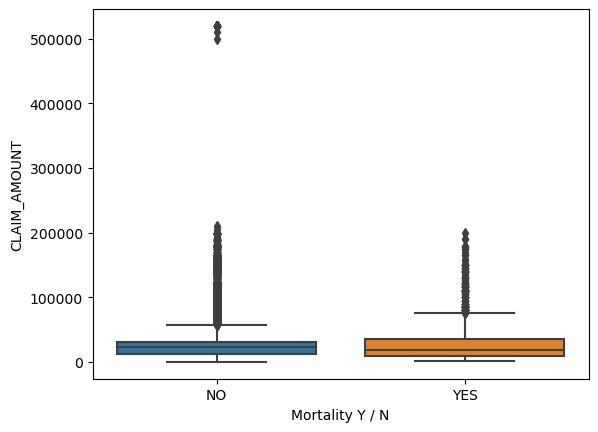

In [354]:
sns.boxplot(new_df["Mortality Y / N"],new_df["CLAIM_AMOUNT"])

In [355]:
new_df.head(5)

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,SRC_REGISTRATION,Disch_after_surgery,FAT/NON_FAT,S/NS,Body_parts,Area_prone,Claim_after_surgery,Claim_after_PreAuth,Surgery_time,Admit_time,Type_as_visit,Change_of_district
0,54,Male,BC,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.1.1.4,PTCA 1 Additional Drug eluting Stent (00.46),Singanamala,Singanamala,Anantapur,2016-09-14,85010,2017-01-11,85010,Yashoda Hospitals - Somajiguda,C,Hyderabad,2016-09-15,2016-09-16,NO,P,1.0,FATAL,Surgery,Heart,Disease_Non_prone_area,118,119,1,2,Least Visited,1
1,61,Male,OC,S9,GENITO URINARY SURGERIES,S9.9.1,Transurethral Resection of Prostate (TURP),Ward-23,Visakhapatnam,Vishakhapatnam,2017-04-11,30000,2017-05-16,30000,ADITYA MULTI CARE HOSPITAL,C,Vishakhapatnam,2017-04-15,2017-04-20,NO,D,5.0,NON_FATAL,Surgery,cancer,Mid_prone_area,31,35,4,9,Least Visited,1
2,0,Male,SC/ST,M4,PEDIATRICS,M4.1.5,Medicalmanagement of Preterm baby of 33 To 34 ...,Racha Konda,Pullalacheruvu,Prakasam,2017-03-11,35000,2017-07-07,30000,"Government General Hospital, Guntur",G,Guntur,2017-03-06,2017-03-13,NO,D,7.0,FATAL,Not Surgery,Other,Disease_Non_prone_area,123,118,-5,2,Most Highly Visited,1
3,50,Male,OC,M6,NEPHROLOGY,M6.4,Medical Management of Chronic Renal Failure 1 ...,Akurajupalli,Machavaram,Guntur,2016-12-16,30870,2017-07-31,29070,"Government General Hospital, Guntur",G,Guntur,2016-12-15,2016-12-19,NO,D,4.0,FATAL,Not Surgery,urinary sysytem,Disease_Prone_Area,228,227,-1,3,Most Highly Visited,0
4,75,Female,SC/ST,S15,POLY TRAUMA,S15.1.1,Surgical Correction Of Longbone Fracture,Ghantasala,Ghantasala,Krishna,2017-01-20,41500,2017-06-06,28300,District Hospital - Machilipatnam,G,Krishna,2017-01-23,2017-01-31,NO,D,8.0,NON_FATAL,Surgery,Organ/Bones,Disease_Prone_Area,134,137,3,11,Least Visited,1


In [356]:
from scipy.stats import chi2_contingency

In [357]:
a= pd.crosstab(new_df.Area_prone,new_df["Mortality Y / N"])

In [358]:
chi2_contingency(a)[1]

2.2906248728899462e-09

In [359]:
cat_col = ["SRC_REGISTRATION","FAT/NON_FAT","S/NS","Body_parts","Area_prone","Type_as_visit","Change_of_district","SEX","CASTE_NAME"]

In [360]:
for i in cat_col:
    tb = pd.crosstab(new_df.loc[:,i],new_df["Mortality Y / N"])
    pv =chi2_contingency(a)[1]
    print("Pvalue of ", i,"is ",pv)

Pvalue of  SRC_REGISTRATION is  2.2906248728899462e-09
Pvalue of  FAT/NON_FAT is  2.2906248728899462e-09
Pvalue of  S/NS is  2.2906248728899462e-09
Pvalue of  Body_parts is  2.2906248728899462e-09
Pvalue of  Area_prone is  2.2906248728899462e-09
Pvalue of  Type_as_visit is  2.2906248728899462e-09
Pvalue of  Change_of_district is  2.2906248728899462e-09
Pvalue of  SEX is  2.2906248728899462e-09
Pvalue of  CASTE_NAME is  2.2906248728899462e-09


In [361]:
new_df.select_dtypes(exclude="object").columns

Index(['AGE', 'PREAUTH_DATE', 'PREAUTH_AMT', 'CLAIM_DATE', 'CLAIM_AMOUNT',
       'SURGERY_DATE', 'DISCHARGE_DATE', 'Disch_after_surgery',
       'Claim_after_surgery', 'Claim_after_PreAuth', 'Surgery_time',
       'Admit_time', 'Change_of_district'],
      dtype='object')

In [362]:
num_col = ['AGE', 'PREAUTH_AMT', 'CLAIM_AMOUNT',
       'Claim_after_surgery', 'Claim_after_PreAuth', 'Surgery_time',
       'Admit_time']

In [363]:
# Changing Data  Type
dt = ["Claim_after_surgery","Claim_after_PreAuth","Surgery_time"]

In [364]:
for i in dt:
    new_df[i] = new_df[i].astype("float64")

In [365]:
from statsmodels.stats.weightstats import ztest as ztest

In [366]:
for i in num_col:
    sample_1 = new_df[new_df["Mortality Y / N"]=="YES"][i]
    sample_2 = new_df[new_df["Mortality Y / N"]=="NO"][i]
    print("Pvalue for", i,"is",ztest(sample_1,sample_2)[1])

Pvalue for AGE is 6.183903757869297e-14
Pvalue for PREAUTH_AMT is 4.583506705745347e-132
Pvalue for CLAIM_AMOUNT is 0.36927888139642295
Pvalue for Claim_after_surgery is 0.0
Pvalue for Claim_after_PreAuth is 0.0
Pvalue for Surgery_time is 2.2856155435302625e-73
Pvalue for Admit_time is 5.984893716149869e-16


In [367]:
# P value is not significant for CLAIM AMOUNT so we will drop that

In [369]:
new_df.head()

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,SRC_REGISTRATION,Disch_after_surgery,FAT/NON_FAT,S/NS,Body_parts,Area_prone,Claim_after_surgery,Claim_after_PreAuth,Surgery_time,Admit_time,Type_as_visit,Change_of_district
0,54,Male,BC,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.1.1.4,PTCA 1 Additional Drug eluting Stent (00.46),Singanamala,Singanamala,Anantapur,2016-09-14,85010,2017-01-11,85010,Yashoda Hospitals - Somajiguda,C,Hyderabad,2016-09-15,2016-09-16,NO,P,1.0,FATAL,Surgery,Heart,Disease_Non_prone_area,118.0,119.0,1.0,2,Least Visited,1
1,61,Male,OC,S9,GENITO URINARY SURGERIES,S9.9.1,Transurethral Resection of Prostate (TURP),Ward-23,Visakhapatnam,Vishakhapatnam,2017-04-11,30000,2017-05-16,30000,ADITYA MULTI CARE HOSPITAL,C,Vishakhapatnam,2017-04-15,2017-04-20,NO,D,5.0,NON_FATAL,Surgery,cancer,Mid_prone_area,31.0,35.0,4.0,9,Least Visited,1
2,0,Male,SC/ST,M4,PEDIATRICS,M4.1.5,Medicalmanagement of Preterm baby of 33 To 34 ...,Racha Konda,Pullalacheruvu,Prakasam,2017-03-11,35000,2017-07-07,30000,"Government General Hospital, Guntur",G,Guntur,2017-03-06,2017-03-13,NO,D,7.0,FATAL,Not Surgery,Other,Disease_Non_prone_area,123.0,118.0,-5.0,2,Most Highly Visited,1
3,50,Male,OC,M6,NEPHROLOGY,M6.4,Medical Management of Chronic Renal Failure 1 ...,Akurajupalli,Machavaram,Guntur,2016-12-16,30870,2017-07-31,29070,"Government General Hospital, Guntur",G,Guntur,2016-12-15,2016-12-19,NO,D,4.0,FATAL,Not Surgery,urinary sysytem,Disease_Prone_Area,228.0,227.0,-1.0,3,Most Highly Visited,0
4,75,Female,SC/ST,S15,POLY TRAUMA,S15.1.1,Surgical Correction Of Longbone Fracture,Ghantasala,Ghantasala,Krishna,2017-01-20,41500,2017-06-06,28300,District Hospital - Machilipatnam,G,Krishna,2017-01-23,2017-01-31,NO,D,8.0,NON_FATAL,Surgery,Organ/Bones,Disease_Prone_Area,134.0,137.0,3.0,11,Least Visited,1


In [370]:
new_df.columns

Index(['AGE', 'SEX', 'CASTE_NAME', 'CATEGORY_CODE', 'CATEGORY_NAME',
       'SURGERY_CODE', 'SURGERY', 'VILLAGE', 'MANDAL_NAME', 'DISTRICT_NAME',
       'PREAUTH_DATE', 'PREAUTH_AMT', 'CLAIM_DATE', 'CLAIM_AMOUNT',
       'HOSP_NAME', 'HOSP_TYPE', 'HOSP_DISTRICT', 'SURGERY_DATE',
       'DISCHARGE_DATE', 'Mortality Y / N', 'SRC_REGISTRATION',
       'Disch_after_surgery', 'FAT/NON_FAT', 'S/NS', 'Body_parts',
       'Area_prone', 'Claim_after_surgery', 'Claim_after_PreAuth',
       'Surgery_time', 'Admit_time', 'Type_as_visit', 'Change_of_district'],
      dtype='object')

In [371]:
mera_df = new_df.drop(columns=['CATEGORY_CODE', 'CATEGORY_NAME',
       'SURGERY_CODE', 'SURGERY', 'VILLAGE', 'MANDAL_NAME', 'DISTRICT_NAME',
       'PREAUTH_DATE', 'PREAUTH_AMT', 'CLAIM_DATE','HOSP_NAME','HOSP_NAME','HOSP_DISTRICT', 'SURGERY_DATE',
       'DISCHARGE_DATE'],axis=1)

In [372]:
mera_df

,AGE,SEX,CASTE_NAME,CLAIM_AMOUNT,HOSP_TYPE,Mortality Y / N,SRC_REGISTRATION,Disch_after_surgery,FAT/NON_FAT,S/NS,Body_parts,Area_prone,Claim_after_surgery,Claim_after_PreAuth,Surgery_time,Admit_time,Type_as_visit,Change_of_district
0,54,Male,BC,85010,C,NO,P,1.0,FATAL,Surgery,Heart,Disease_Non_prone_area,118.0,119.0,1.0,2,Least Visited,1
1,61,Male,OC,30000,C,NO,D,5.0,NON_FATAL,Surgery,cancer,Mid_prone_area,31.0,35.0,4.0,9,Least Visited,1
2,0,Male,SC/ST,30000,G,NO,D,7.0,FATAL,Not Surgery,Other,Disease_Non_prone_area,123.0,118.0,-5.0,2,Most Highly Visited,1
3,50,Male,OC,29070,G,NO,D,4.0,FATAL,Not Surgery,urinary sysytem,Disease_Prone_Area,228.0,227.0,-1.0,3,Most Highly Visited,0
4,75,Female,SC/ST,28300,G,NO,D,8.0,NON_FATAL,Surgery,Organ/Bones,Disease_Prone_Area,134.0,137.0,3.0,11,Least Visited,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,69,Male,OC,20000,C,NO,D,5.0,NON_FATAL,Surgery,Organ/Bones,Disease_Non_prone_area,62.0,60.0,-2.0,3,Most Highly Visited,1
199996,34,Female,BC,70000,C,NO,D,3.0,FATAL,Surgery,Brain,Disease_Non_prone_area,147.0,149.0,2.0,5,Highly Visited,1
199997,52,Male,SC/ST,50000,G,NO,D,11.0,FATAL,Surgery,Brain,Disease_Non_prone_area,146.0,150.0,4.0,15,Most Highly Visited,0
199998,50,Female,BC,30000,C,NO,D,5.0,NON_FATAL,Surgery,Organ/Bones,Mid_prone_area,78.0,79.0,1.0,6,Least Visited,1


In [373]:
# Encoding

In [374]:
mera_df["S/NS"].value_counts()

Surgery        140262
Not Surgery     57808
Name: S/NS, dtype: int64

In [375]:
mera_df.SEX = np.where(mera_df.SEX=="Male",1,0)

In [376]:
mera_df.HOSP_TYPE= np.where(mera_df.HOSP_TYPE=="C",1,0)

In [377]:
mera_df["Mortality Y / N"] = np.where(mera_df["Mortality Y / N"]=="NO",1,0)

In [378]:
mera_df["FAT/NON_FAT"] = np.where(mera_df["FAT/NON_FAT"]=="NON_FATAL",1,0)

In [379]:
mera_df["S/NS"] = np.where(mera_df["S/NS"]=="Surgery",1,0)

In [380]:
mera_df

,AGE,SEX,CASTE_NAME,CLAIM_AMOUNT,HOSP_TYPE,Mortality Y / N,SRC_REGISTRATION,Disch_after_surgery,FAT/NON_FAT,S/NS,Body_parts,Area_prone,Claim_after_surgery,Claim_after_PreAuth,Surgery_time,Admit_time,Type_as_visit,Change_of_district
0,54,1,BC,85010,1,1,P,1.0,0,1,Heart,Disease_Non_prone_area,118.0,119.0,1.0,2,Least Visited,1
1,61,1,OC,30000,1,1,D,5.0,1,1,cancer,Mid_prone_area,31.0,35.0,4.0,9,Least Visited,1
2,0,1,SC/ST,30000,0,1,D,7.0,0,0,Other,Disease_Non_prone_area,123.0,118.0,-5.0,2,Most Highly Visited,1
3,50,1,OC,29070,0,1,D,4.0,0,0,urinary sysytem,Disease_Prone_Area,228.0,227.0,-1.0,3,Most Highly Visited,0
4,75,0,SC/ST,28300,0,1,D,8.0,1,1,Organ/Bones,Disease_Prone_Area,134.0,137.0,3.0,11,Least Visited,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,69,1,OC,20000,1,1,D,5.0,1,1,Organ/Bones,Disease_Non_prone_area,62.0,60.0,-2.0,3,Most Highly Visited,1
199996,34,0,BC,70000,1,1,D,3.0,0,1,Brain,Disease_Non_prone_area,147.0,149.0,2.0,5,Highly Visited,1
199997,52,1,SC/ST,50000,0,1,D,11.0,0,1,Brain,Disease_Non_prone_area,146.0,150.0,4.0,15,Most Highly Visited,0
199998,50,0,BC,30000,1,1,D,5.0,1,1,Organ/Bones,Mid_prone_area,78.0,79.0,1.0,6,Least Visited,1


In [381]:
fc= ["CASTE_NAME","SRC_REGISTRATION","Body_parts","Area_prone","Type_as_visit"]
for i in fc:
    d = mera_df[i].value_counts(normalize=True).to_dict()
    mera_df[i]= mera_df[i].map(d)

In [382]:
mera_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198070 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   AGE                  198070 non-null  int64  
 1   SEX                  198070 non-null  int32  
 2   CASTE_NAME           198070 non-null  float64
 3   CLAIM_AMOUNT         198070 non-null  int64  
 4   HOSP_TYPE            198070 non-null  int32  
 5   Mortality Y / N      198070 non-null  int32  
 6   SRC_REGISTRATION     198070 non-null  float64
 7   Disch_after_surgery  198070 non-null  float64
 8   FAT/NON_FAT          198070 non-null  int32  
 9   S/NS                 198070 non-null  int32  
 10  Body_parts           198070 non-null  float64
 11  Area_prone           198070 non-null  float64
 12  Claim_after_surgery  198070 non-null  float64
 13  Claim_after_PreAuth  198070 non-null  float64
 14  Surgery_time         198070 non-null  float64
 15  Admit_time       

In [383]:
# Changing D Type
dt = ["Claim_after_surgery","Claim_after_PreAuth","Surgery_time"]

In [384]:
for i in dt:
    mera_df[i] = mera_df[i].astype("float")

In [385]:
from sklearn.model_selection import train_test_split

In [386]:
x= mera_df.drop("Mortality Y / N",axis=1)
y = mera_df["Mortality Y / N"]

In [387]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.80)

In [388]:
from imblearn.over_sampling import SMOTE
sm= SMOTE()
x_train_s ,y_train_s =sm.fit_resample(x_train,y_train)

In [389]:
mera_df

,AGE,SEX,CASTE_NAME,CLAIM_AMOUNT,HOSP_TYPE,Mortality Y / N,SRC_REGISTRATION,Disch_after_surgery,FAT/NON_FAT,S/NS,Body_parts,Area_prone,Claim_after_surgery,Claim_after_PreAuth,Surgery_time,Admit_time,Type_as_visit,Change_of_district
0,54,1,0.513642,85010,1,1,0.039971,1.0,0,1,0.130792,0.370394,118.0,119.0,1.0,2,0.274196,1
1,61,1,0.238784,30000,1,1,0.912925,5.0,1,1,0.295168,0.320261,31.0,35.0,4.0,9,0.274196,1
2,0,1,0.186485,30000,0,1,0.912925,7.0,0,0,0.152774,0.370394,123.0,118.0,-5.0,2,0.179144,1
3,50,1,0.238784,29070,0,1,0.912925,4.0,0,0,0.153900,0.309345,228.0,227.0,-1.0,3,0.179144,0
4,75,0,0.186485,28300,0,1,0.912925,8.0,1,1,0.168168,0.309345,134.0,137.0,3.0,11,0.274196,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,69,1,0.238784,20000,1,1,0.912925,5.0,1,1,0.168168,0.370394,62.0,60.0,-2.0,3,0.179144,1
199996,34,0,0.513642,70000,1,1,0.912925,3.0,0,1,0.050083,0.370394,147.0,149.0,2.0,5,0.188852,1
199997,52,1,0.186485,50000,0,1,0.912925,11.0,0,1,0.050083,0.370394,146.0,150.0,4.0,15,0.179144,0
199998,50,0,0.513642,30000,1,1,0.912925,5.0,1,1,0.168168,0.320261,78.0,79.0,1.0,6,0.274196,1


In [390]:
# Fitting The models

In [391]:
import statsmodels.api as sma

In [392]:
x_train_c=sma.add_constant(x_train_s)
t_test_c=sma.add_constant(x_test)

In [393]:
base_model=sma.Logit(y_train_s,x_train_c).fit()

         Current function value: 0.298197
         Iterations: 35


In [394]:
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Mortality Y / N   No. Observations:               313078
Model:                          Logit   Df Residuals:                   313060
Method:                           MLE   Df Model:                           17
Date:                Fri, 31 Mar 2023   Pseudo R-squ.:                  0.5698
Time:                        14:33:13   Log-Likelihood:                -93359.
converged:                      False   LL-Null:                   -2.1701e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.1234      0.094     11.982      0.000       0.940       1.307
AGE                    -0.0224      0.000    -71.440      0.000      -0.023      -0.022
SEX                     0.9447      0.012     78.132      0.000       0.921       0.968
CASTE_NAME              0.2612      0.040      6.547      0.000       0.183       0.339
CLAIM_AMOUNT         1.256e-06   2.92e-07      4.298      0.000    6.83e-07    1.83e-06
HOSP_TYPE               1.2204      0.013     90.690      0.000       1.194       1.247
SRC_REGISTRATION       -0.1870      0.025     -7.484      0.000      -0.236      -0.138
Disch_after_surgery    -2.5558      0.018   -143.737      0.000      -2.591      -2.521
FAT/NON_FAT             2.4078      0.032     75.213      0.000       2.345       2.471
S/NS                    1.0557      0.021     49.414      0.000       1.014       1.098
Body_parts             -1.7939      0.124    -14.435      0.000      -2.037      -1.550
Area_prone             -2.8271      0.257    -11.009      0.000      -3.330      -2.324
Claim_after_surgery     0.8389   1271.688      0.001      0.999   -2491.624    2493.302
Claim_after_PreAuth    -0.8480   1271.688     -0.001      0.999   -2493.311    2491.615
Surgery_time           -1.6520   1271.688     -0.001      0.999   -2494.115    2490.811
Admit_time              2.6144      0.018    145.768      0.000       2.579       2.650
Type_as_visit          -1.7592      0.087    -20.203      0.000      -1.930      -1.589
Change_of_district      1.1823      0.017     67.922      0.000       1.148       1.216
=======================================================================================
"""

In [395]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [396]:
y_pred_base = base_model.predict(t_test_c)

In [397]:
y_pred_base1 = np.where(y_pred_base>0.5,1,0)

In [398]:
print(classification_report(y_test,y_pred_base1))

              precision    recall  f1-score   support

           0       0.05      0.64      0.09       438
           1       1.00      0.86      0.92     39176

    accuracy                           0.85     39614
   macro avg       0.52      0.75      0.50     39614
weighted avg       0.98      0.85      0.91     39614



In [399]:
print(confusion_matrix(y_test,y_pred_base1))

[[  279   159]
 [ 5636 33540]]


<AxesSubplot:>

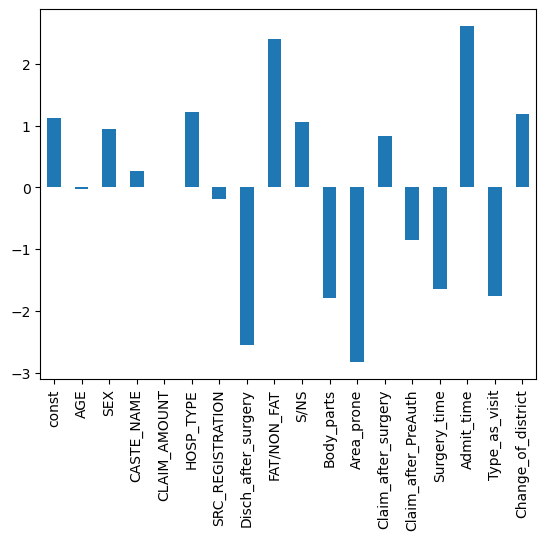

In [412]:
base_model.params.plot(kind="bar")

In [413]:
accuracy_score(y_test,y_pred_base1)

0.8537133336699146

In [414]:
from sklearn.tree import DecisionTreeClassifier

In [415]:
dt = DecisionTreeClassifier(max_depth=3)

In [416]:
model_dt = dt.fit(x_train_s,y_train_s)

In [417]:
y_pred_dt = model_dt.predict(x_test)

In [418]:
from sklearn.metrics import f1_score,accuracy_score,precision_score

In [419]:
print(classification_report(y_test,y_pred_dt))
print(confusion_matrix(y_test,y_pred_dt))
print("accuracy_score of decision tree :",accuracy_score(y_test,y_pred_dt))
#print("precision_score",precision_score(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.05      0.55      0.09       438
           1       0.99      0.87      0.93     39176

    accuracy                           0.87     39614
   macro avg       0.52      0.71      0.51     39614
weighted avg       0.98      0.87      0.92     39614

[[  242   196]
 [ 4970 34206]]
accuracy_score of decision tree : 0.8695915585399101


In [420]:
f1_score(y_test,y_pred_dt)

0.9297887955638914

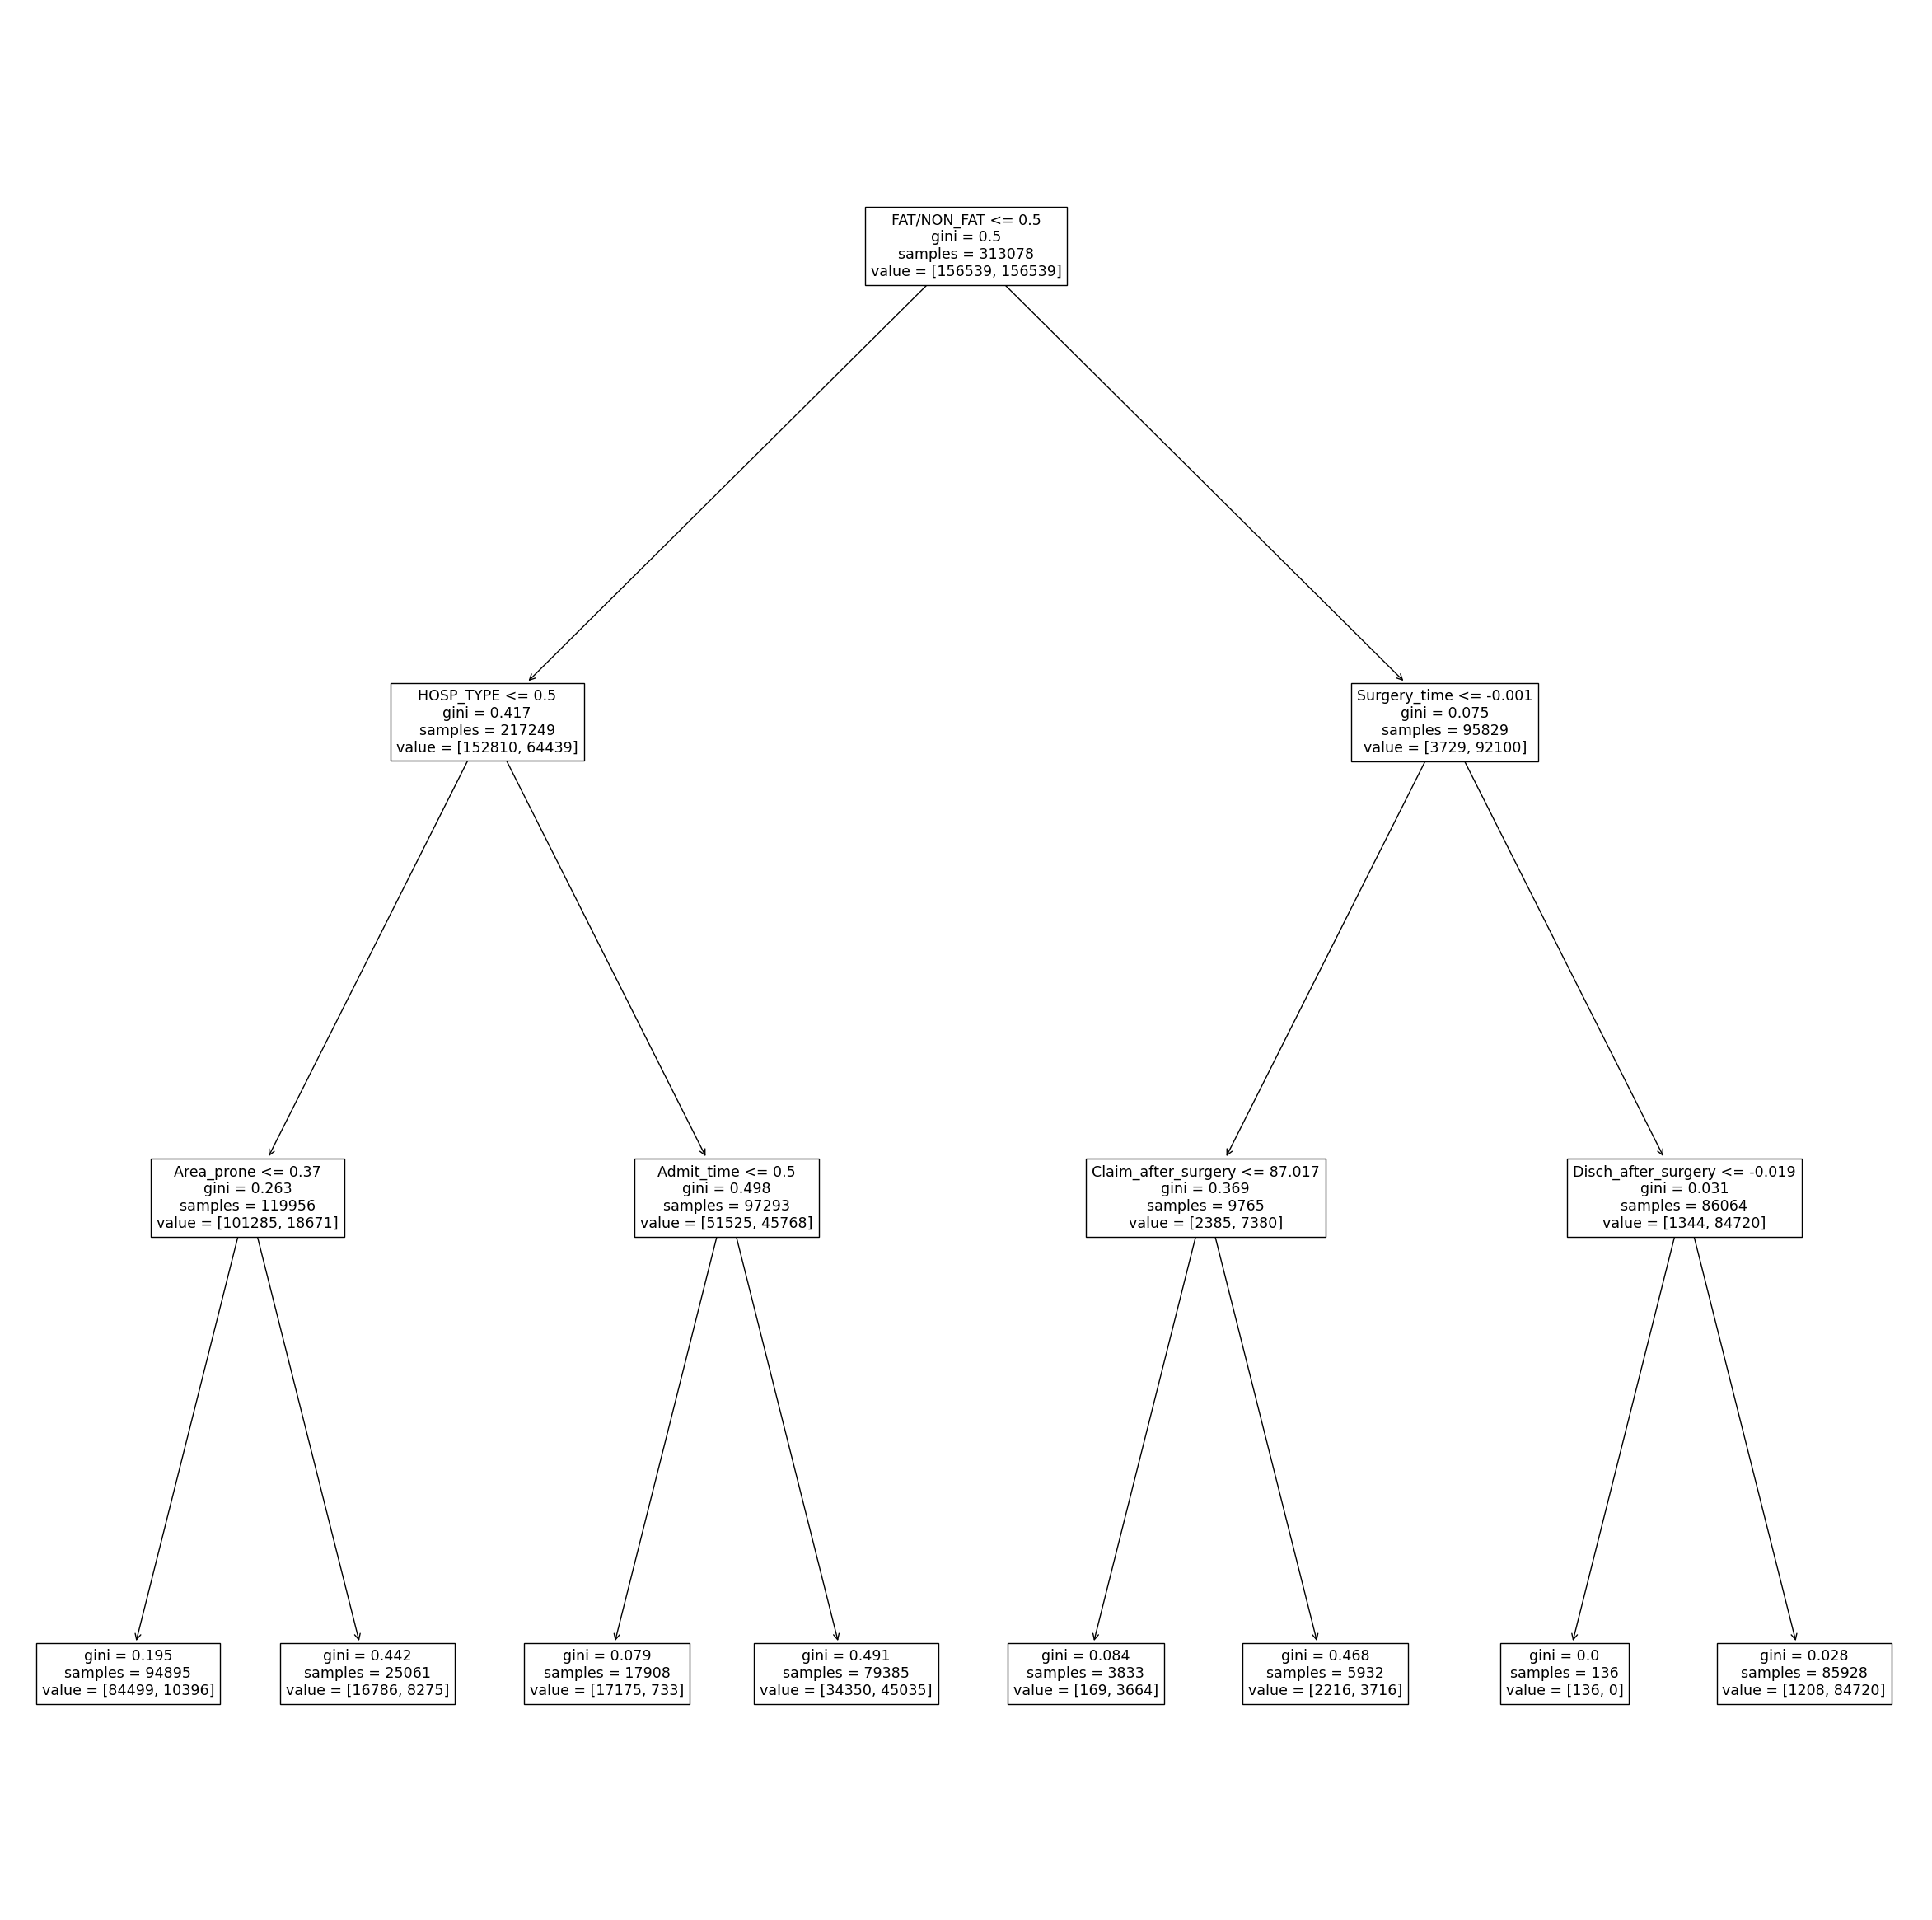

In [421]:
from sklearn.tree import plot_tree
plt.figure(figsize=[30,30])
plot_tree(dt,feature_names=x.columns)
plt.show()

In [422]:
from sklearn.naive_bayes import GaussianNB
dt=GaussianNB()
model_dt = dt.fit(x_train_s,y_train_s)
y_pred_dt = model_dt.predict(x_test)
print("accuracy_score of naive beyes",accuracy_score(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

accuracy_score of naive beyes 0.8322815166355328
              precision    recall  f1-score   support

           0       0.04      0.70      0.08       438
           1       1.00      0.83      0.91     39176

    accuracy                           0.83     39614
   macro avg       0.52      0.77      0.50     39614
weighted avg       0.99      0.83      0.90     39614



In [423]:
from sklearn.ensemble import RandomForestClassifier
dt=RandomForestClassifier(n_estimators=3,max_depth=3)
model_dt = dt.fit(x_train_s,y_train_s)
y_pred_dt = model_dt.predict(x_test)
print("accuracy_score of random forest",accuracy_score(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

accuracy_score of random forest 0.7385267834603928
              precision    recall  f1-score   support

           0       0.03      0.79      0.06       438
           1       1.00      0.74      0.85     39176

    accuracy                           0.74     39614
   macro avg       0.51      0.76      0.46     39614
weighted avg       0.99      0.74      0.84     39614



In [424]:
from sklearn.ensemble import AdaBoostClassifier
dt=AdaBoostClassifier()
model_dt = dt.fit(x_train_s,y_train_s)
y_pred_dt = model_dt.predict(x_test)
print("accuracy_score of ADABOOST",accuracy_score(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

accuracy_score of ADABOOST 0.9675619730398344
              precision    recall  f1-score   support

           0       0.15      0.40      0.22       438
           1       0.99      0.97      0.98     39176

    accuracy                           0.97     39614
   macro avg       0.57      0.69      0.60     39614
weighted avg       0.98      0.97      0.97     39614



In [425]:
from sklearn.ensemble import GradientBoostingClassifier
dt=GradientBoostingClassifier()
model_dt = dt.fit(x_train_s,y_train_s)
y_pred_dt = model_dt.predict(x_test)
print("accuracy_score of Gradient:",accuracy_score(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

accuracy_score of Gradient: 0.9829605694956328
              precision    recall  f1-score   support

           0       0.29      0.37      0.32       438
           1       0.99      0.99      0.99     39176

    accuracy                           0.98     39614
   macro avg       0.64      0.68      0.66     39614
weighted avg       0.99      0.98      0.98     39614



In [426]:
from xgboost import XGBClassifier
dt=XGBClassifier()
y_pred_dt = model_dt.predict(x_test)
print("accuracy_score of XGBoosting",accuracy_score(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

accuracy_score of XGBoosting 0.9829605694956328
              precision    recall  f1-score   support

           0       0.29      0.37      0.32       438
           1       0.99      0.99      0.99     39176

    accuracy                           0.98     39614
   macro avg       0.64      0.68      0.66     39614
weighted avg       0.99      0.98      0.98     39614



# boosting models are overfitting

In [427]:
new_df.head(1)

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,SRC_REGISTRATION,Disch_after_surgery,FAT/NON_FAT,S/NS,Body_parts,Area_prone,Claim_after_surgery,Claim_after_PreAuth,Surgery_time,Admit_time,Type_as_visit,Change_of_district
0,54,Male,BC,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.1.1.4,PTCA 1 Additional Drug eluting Stent (00.46),Singanamala,Singanamala,Anantapur,2016-09-14,85010,2017-01-11,85010,Yashoda Hospitals - Somajiguda,C,Hyderabad,2016-09-15,2016-09-16,NO,P,1.0,FATAL,Surgery,Heart,Disease_Non_prone_area,118.0,119.0,1.0,2,Least Visited,1


In [428]:
from scipy.stats import chi2_contingency

In [429]:
from scipy.stats import f_oneway

In [430]:
a

Mortality Y / N,NO,YES
Area_prone,,
Disease_Non_prone_area,72498,866
Disease_Prone_Area,60661,611
Mid_prone_area,62556,878


In [431]:
chi2_contingency(a)[1]

2.2906248728899462e-09

In [432]:
# Category vs Number
# SEX and AGE

In [433]:
sample_1 = new_df[new_df["SEX"]=="Male"]["AGE"]
sample_2 = new_df[new_df["SEX"]=="Female"]["AGE"]

In [434]:
from statsmodels.stats.weightstats import ztest as ztest

In [435]:
ztest(sample_1,sample_2)

(-22.414476261651437, 2.8436638622482492e-111)

In [436]:
# Category more than 2 annova

In [437]:
# Num vs Num : One way Annova

In [438]:
from statsmodels.formula.api import ols

In [439]:
model = ols("AGE~CLAIM_AMOUNT",data=new_df).fit()

In [440]:
from statsmodels.stats.anova import anova_lm

In [441]:
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
CLAIM_AMOUNT,1.0,7.893120e+04,78931.197406,220.640183,6.976723e-50
Residual,198068.0,7.085629e+07,357.737183,NaN,NaN


In [442]:
new_df

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,SRC_REGISTRATION,Disch_after_surgery,FAT/NON_FAT,S/NS,Body_parts,Area_prone,Claim_after_surgery,Claim_after_PreAuth,Surgery_time,Admit_time,Type_as_visit,Change_of_district
0,54,Male,BC,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.1.1.4,PTCA 1 Additional Drug eluting Stent (00.46),Singanamala,Singanamala,Anantapur,2016-09-14,85010,2017-01-11,85010,Yashoda Hospitals - Somajiguda,C,Hyderabad,2016-09-15,2016-09-16,NO,P,1.0,FATAL,Surgery,Heart,Disease_Non_prone_area,118.0,119.0,1.0,2,Least Visited,1
1,61,Male,OC,S9,GENITO URINARY SURGERIES,S9.9.1,Transurethral Resection of Prostate (TURP),Ward-23,Visakhapatnam,Vishakhapatnam,2017-04-11,30000,2017-05-16,30000,ADITYA MULTI CARE HOSPITAL,C,Vishakhapatnam,2017-04-15,2017-04-20,NO,D,5.0,NON_FATAL,Surgery,cancer,Mid_prone_area,31.0,35.0,4.0,9,Least Visited,1
2,0,Male,SC/ST,M4,PEDIATRICS,M4.1.5,Medicalmanagement of Preterm baby of 33 To 34 ...,Racha Konda,Pullalacheruvu,Prakasam,2017-03-11,35000,2017-07-07,30000,"Government General Hospital, Guntur",G,Guntur,2017-03-06,2017-03-13,NO,D,7.0,FATAL,Not Surgery,Other,Disease_Non_prone_area,123.0,118.0,-5.0,2,Most Highly Visited,1
3,50,Male,OC,M6,NEPHROLOGY,M6.4,Medical Management of Chronic Renal Failure 1 ...,Akurajupalli,Machavaram,Guntur,2016-12-16,30870,2017-07-31,29070,"Government General Hospital, Guntur",G,Guntur,2016-12-15,2016-12-19,NO,D,4.0,FATAL,Not Surgery,urinary sysytem,Disease_Prone_Area,228.0,227.0,-1.0,3,Most Highly Visited,0
4,75,Female,SC/ST,S15,POLY TRAUMA,S15.1.1,Surgical Correction Of Longbone Fracture,Ghantasala,Ghantasala,Krishna,2017-01-20,41500,2017-06-06,28300,District Hospital - Machilipatnam,G,Krishna,2017-01-23,2017-01-31,NO,D,8.0,NON_FATAL,Surgery,Organ/Bones,Disease_Prone_Area,134.0,137.0,3.0,11,Least Visited,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,69,Male,OC,S15,POLY TRAUMA,S15.3.1.2,Intesive care management for Chest injuries in...,Anikala Palli,Chadrasekarapuram,Prakasam,2017-06-10,35000,2017-08-09,20000,Narayana Medical College Hospital,C,Nellore,2017-06-08,2017-06-13,NO,D,5.0,NON_FATAL,Surgery,Organ/Bones,Disease_Non_prone_area,62.0,60.0,-2.0,3,Most Highly Visited,1
199996,34,Female,BC,S10,NEUROSURGERY,S10.1.7,Excision of Basal Brain tumour,Chadrasekarapuram,Chadrasekarapuram,Prakasam,2016-12-18,70000,2017-05-16,70000,SIMHAPURI HOSPITALS,C,Nellore,2016-12-20,2016-12-23,NO,D,3.0,FATAL,Surgery,Brain,Disease_Non_prone_area,147.0,149.0,2.0,5,Highly Visited,1
199997,52,Male,SC/ST,S10,NEUROSURGERY,S10.5.4,"Spinal Fixation Rods And Plates, Artificial Discs",Banaganapalle,Banaganapalle,Kurnool,2016-12-23,85000,2017-05-22,50000,Govt General Hospital Kurnool,G,Kurnool,2016-12-27,2017-01-07,NO,D,11.0,FATAL,Surgery,Brain,Disease_Non_prone_area,146.0,150.0,4.0,15,Most Highly Visited,0
199998,50,Female,BC,S15,POLY TRAUMA,S15.1.1,Surgical Correction Of Longbone Fracture,Bayyavaram,Kasimkota,Vishakhapatnam,2016-11-16,30000,2017-02-03,30000,USHA PRIME MULTI SPECIALITY HOSPITAL A DIVISIO...,C,Vishakhapatnam,2016-11-17,2016-11-22,NO,D,5.0,NON_FATAL,Surgery,Organ/Bones,Mid_prone_area,78.0,79.0,1.0,6,Least Visited,1


In [443]:
a = pd.crosstab(new_df["DISTRICT_NAME"],new_df["HOSP_TYPE"])

In [444]:
a["C/G"] = a["G"]/a["C"]

In [445]:
a

HOSP_TYPE,C,G,C/G
DISTRICT_NAME,,,
Anantapur,9187,2741,0.298356
Chittoor,7369,7855,1.065952
East Godavari,18289,4985,0.272568
Guntur,16265,4380,0.269290
Krishna,15284,2069,0.135370
Kurnool,8862,4319,0.487362
Nellore,14724,1476,0.100244
Prakasam,12330,2032,0.164801
Srikakulam,8775,2203,0.251054


In [446]:
new_df

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,SRC_REGISTRATION,Disch_after_surgery,FAT/NON_FAT,S/NS,Body_parts,Area_prone,Claim_after_surgery,Claim_after_PreAuth,Surgery_time,Admit_time,Type_as_visit,Change_of_district
0,54,Male,BC,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.1.1.4,PTCA 1 Additional Drug eluting Stent (00.46),Singanamala,Singanamala,Anantapur,2016-09-14,85010,2017-01-11,85010,Yashoda Hospitals - Somajiguda,C,Hyderabad,2016-09-15,2016-09-16,NO,P,1.0,FATAL,Surgery,Heart,Disease_Non_prone_area,118.0,119.0,1.0,2,Least Visited,1
1,61,Male,OC,S9,GENITO URINARY SURGERIES,S9.9.1,Transurethral Resection of Prostate (TURP),Ward-23,Visakhapatnam,Vishakhapatnam,2017-04-11,30000,2017-05-16,30000,ADITYA MULTI CARE HOSPITAL,C,Vishakhapatnam,2017-04-15,2017-04-20,NO,D,5.0,NON_FATAL,Surgery,cancer,Mid_prone_area,31.0,35.0,4.0,9,Least Visited,1
2,0,Male,SC/ST,M4,PEDIATRICS,M4.1.5,Medicalmanagement of Preterm baby of 33 To 34 ...,Racha Konda,Pullalacheruvu,Prakasam,2017-03-11,35000,2017-07-07,30000,"Government General Hospital, Guntur",G,Guntur,2017-03-06,2017-03-13,NO,D,7.0,FATAL,Not Surgery,Other,Disease_Non_prone_area,123.0,118.0,-5.0,2,Most Highly Visited,1
3,50,Male,OC,M6,NEPHROLOGY,M6.4,Medical Management of Chronic Renal Failure 1 ...,Akurajupalli,Machavaram,Guntur,2016-12-16,30870,2017-07-31,29070,"Government General Hospital, Guntur",G,Guntur,2016-12-15,2016-12-19,NO,D,4.0,FATAL,Not Surgery,urinary sysytem,Disease_Prone_Area,228.0,227.0,-1.0,3,Most Highly Visited,0
4,75,Female,SC/ST,S15,POLY TRAUMA,S15.1.1,Surgical Correction Of Longbone Fracture,Ghantasala,Ghantasala,Krishna,2017-01-20,41500,2017-06-06,28300,District Hospital - Machilipatnam,G,Krishna,2017-01-23,2017-01-31,NO,D,8.0,NON_FATAL,Surgery,Organ/Bones,Disease_Prone_Area,134.0,137.0,3.0,11,Least Visited,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,69,Male,OC,S15,POLY TRAUMA,S15.3.1.2,Intesive care management for Chest injuries in...,Anikala Palli,Chadrasekarapuram,Prakasam,2017-06-10,35000,2017-08-09,20000,Narayana Medical College Hospital,C,Nellore,2017-06-08,2017-06-13,NO,D,5.0,NON_FATAL,Surgery,Organ/Bones,Disease_Non_prone_area,62.0,60.0,-2.0,3,Most Highly Visited,1
199996,34,Female,BC,S10,NEUROSURGERY,S10.1.7,Excision of Basal Brain tumour,Chadrasekarapuram,Chadrasekarapuram,Prakasam,2016-12-18,70000,2017-05-16,70000,SIMHAPURI HOSPITALS,C,Nellore,2016-12-20,2016-12-23,NO,D,3.0,FATAL,Surgery,Brain,Disease_Non_prone_area,147.0,149.0,2.0,5,Highly Visited,1
199997,52,Male,SC/ST,S10,NEUROSURGERY,S10.5.4,"Spinal Fixation Rods And Plates, Artificial Discs",Banaganapalle,Banaganapalle,Kurnool,2016-12-23,85000,2017-05-22,50000,Govt General Hospital Kurnool,G,Kurnool,2016-12-27,2017-01-07,NO,D,11.0,FATAL,Surgery,Brain,Disease_Non_prone_area,146.0,150.0,4.0,15,Most Highly Visited,0
199998,50,Female,BC,S15,POLY TRAUMA,S15.1.1,Surgical Correction Of Longbone Fracture,Bayyavaram,Kasimkota,Vishakhapatnam,2016-11-16,30000,2017-02-03,30000,USHA PRIME MULTI SPECIALITY HOSPITAL A DIVISIO...,C,Vishakhapatnam,2016-11-17,2016-11-22,NO,D,5.0,NON_FATAL,Surgery,Organ/Bones,Mid_prone_area,78.0,79.0,1.0,6,Least Visited,1


In [447]:
new_df.HOSP_NAME.value_counts()[0:200]

Sri Venkateswara Institute Of Medical Sciences                                   9006
King George Hospital                                                             5565
BASAVATARAKAM INDO AMERICAN CANCER HOSPITAL and RESEARCH INSTITUTE, Hyderabad    5249
Government General Hospital, Guntur                                              5046
Government General Hospital,Kakinada                                             4328
                                                                                 ... 
FARZANA HOSPITALS                                                                 214
ABC HOSPITALS                                                                     214
MADHAVA HOSPITAL                                                                  211
Royal Hospital                                                                    208
LOTUS HOSPITAL                                                                    207
Name: HOSP_NAME, Length: 200, dtype: int64

<AxesSubplot:xlabel='Body_parts'>

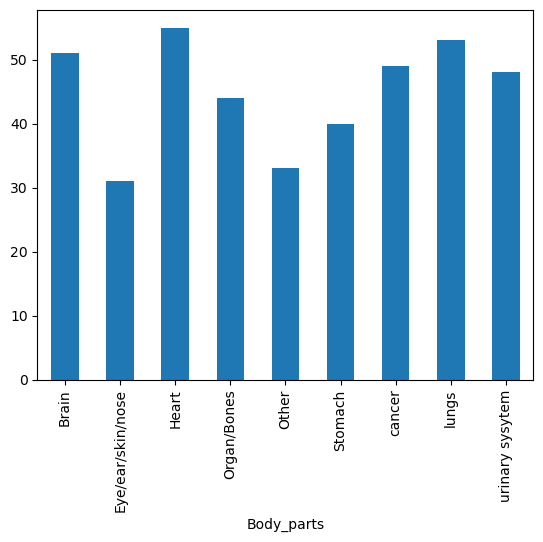

In [448]:
new_df.groupby("Body_parts")["AGE"].median().plot(kind="bar")

In [449]:
new_df.groupby("Body_parts")["SEX"].describe()

,count,unique,top,freq
Body_parts,,,,
Brain,9920,2,Male,5992
Eye/ear/skin/nose,5723,2,Female,3232
Heart,25906,2,Male,17730
Organ/Bones,33309,2,Male,22345
Other,30260,2,Male,17736
Stomach,2137,2,Male,1621
cancer,58464,2,Female,32388
lungs,1868,2,Male,1238
urinary sysytem,30483,2,Male,22312


<AxesSubplot:xlabel='Body_parts'>

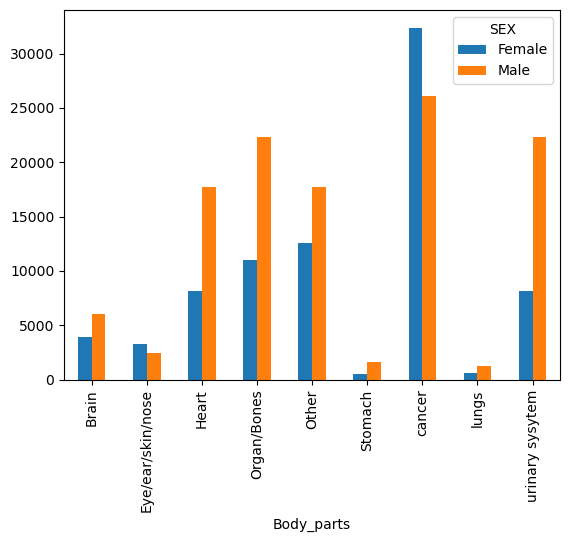

In [450]:
pd.crosstab(new_df['Body_parts'], new_df['SEX']).plot(kind="bar")

In [451]:
new_df.head()

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,SRC_REGISTRATION,Disch_after_surgery,FAT/NON_FAT,S/NS,Body_parts,Area_prone,Claim_after_surgery,Claim_after_PreAuth,Surgery_time,Admit_time,Type_as_visit,Change_of_district
0,54,Male,BC,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.1.1.4,PTCA 1 Additional Drug eluting Stent (00.46),Singanamala,Singanamala,Anantapur,2016-09-14,85010,2017-01-11,85010,Yashoda Hospitals - Somajiguda,C,Hyderabad,2016-09-15,2016-09-16,NO,P,1.0,FATAL,Surgery,Heart,Disease_Non_prone_area,118.0,119.0,1.0,2,Least Visited,1
1,61,Male,OC,S9,GENITO URINARY SURGERIES,S9.9.1,Transurethral Resection of Prostate (TURP),Ward-23,Visakhapatnam,Vishakhapatnam,2017-04-11,30000,2017-05-16,30000,ADITYA MULTI CARE HOSPITAL,C,Vishakhapatnam,2017-04-15,2017-04-20,NO,D,5.0,NON_FATAL,Surgery,cancer,Mid_prone_area,31.0,35.0,4.0,9,Least Visited,1
2,0,Male,SC/ST,M4,PEDIATRICS,M4.1.5,Medicalmanagement of Preterm baby of 33 To 34 ...,Racha Konda,Pullalacheruvu,Prakasam,2017-03-11,35000,2017-07-07,30000,"Government General Hospital, Guntur",G,Guntur,2017-03-06,2017-03-13,NO,D,7.0,FATAL,Not Surgery,Other,Disease_Non_prone_area,123.0,118.0,-5.0,2,Most Highly Visited,1
3,50,Male,OC,M6,NEPHROLOGY,M6.4,Medical Management of Chronic Renal Failure 1 ...,Akurajupalli,Machavaram,Guntur,2016-12-16,30870,2017-07-31,29070,"Government General Hospital, Guntur",G,Guntur,2016-12-15,2016-12-19,NO,D,4.0,FATAL,Not Surgery,urinary sysytem,Disease_Prone_Area,228.0,227.0,-1.0,3,Most Highly Visited,0
4,75,Female,SC/ST,S15,POLY TRAUMA,S15.1.1,Surgical Correction Of Longbone Fracture,Ghantasala,Ghantasala,Krishna,2017-01-20,41500,2017-06-06,28300,District Hospital - Machilipatnam,G,Krishna,2017-01-23,2017-01-31,NO,D,8.0,NON_FATAL,Surgery,Organ/Bones,Disease_Prone_Area,134.0,137.0,3.0,11,Least Visited,1


<AxesSubplot:>

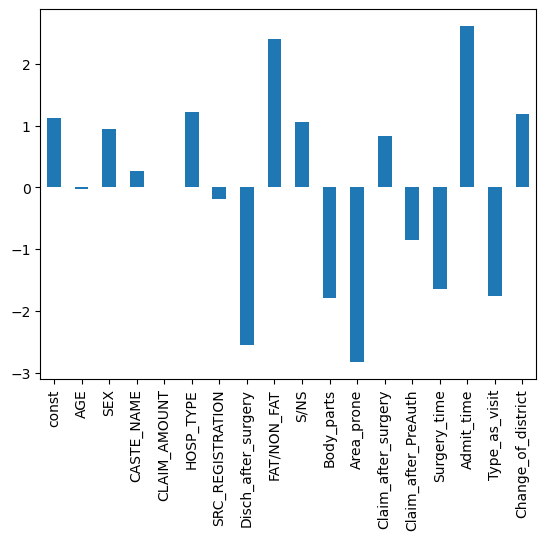

In [452]:
base_model.params.plot(kind="bar")